In [2]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import scipy
from scipy import stats
import numpy as np
import dataframe_image as dfi
import statsmodels.api as sm

In [3]:
# read file into pandas dataframe
# drop the columns with N/A values
# plot scatter plot
file = "/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/Pineapple juice effect.csv"
read_file = pd.read_csv(file, delimiter = ",", header= 0)
read_file

,Record Id,Portal ID LMS0 (pre PJ),LMS0 (pre PJ),Portal ID LMS1 (post PJ),LMS1 (post PJ),Unnamed: 5,Unnamed: 6,Unnamed: 7,cT1 (Pre PJ),Iron (Pre PJ),...,cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1 Ref Int Lower,cT1 Ref Int Upper,Iron Ref Int,PDFF Ref Int
0,EXP010_002,11947,EXP010vhobplp,9827,EXP010kfnnfem,NaN,NaN,NaN,654.0,1.1,...,668.0,735.0,1.1,1.2,3.8,5.9,633,794,1.8,5.6
1,EXP010_003,9625,EXP010vetygxw,9623,EXP010nzjwutv,NaN,NaN,NaN,667.0,1.1,...,640.0,696.0,1.0,1.1,4.1,7.0,633,794,1.8,5.6
2,EXP010_004,9834,EXP010vkcrjqc,9830,EXP010ooxyfwn,NaN,NaN,NaN,836.0,1.0,...,810.0,881.0,0.8,0.8,1.1,2.7,633,794,1.8,5.6
3,EXP010_005,9818,EXP010vpitawu,9816,EXP010otlxkrz,NaN,NaN,NaN,826.0,1.0,...,786.0,867.0,0.9,1.0,0.4,3.1,633,794,1.8,5.6
4,EXP010_006,9843,EXP010vuvdody,9840,EXP010ochlmjx,NaN,NaN,NaN,638.0,1.1,...,616.0,678.0,1.1,1.2,1.6,3.8,633,794,1.8,5.6
5,EXP010_007,9820,EXP010woaclvx,9814,EXP010ogwfklv,NaN,NaN,NaN,658.0,1.1,...,632.0,688.0,1.0,1.1,0.0,2.7,633,794,1.8,5.6
6,EXP010_008,9618,EXP010wktzdls,9616,EXP010olbctkw,NaN,NaN,NaN,823.0,0.9,...,764.0,842.0,0.8,0.9,1.3,3.1,633,794,1.8,5.6
7,EXP010_009,9819,EXP010waxoiey,9815,EXP010opqcxxj,NaN,NaN,NaN,615.0,1.3,...,600.0,656.0,1.3,1.5,0.0,3.1,633,794,1.8,5.6
8,EXP010_011,9962,EXP010wlnocav,9958,EXP010oyklrkq,NaN,NaN,NaN,962.0,1.3,...,917.0,1045.0,1.3,1.4,19.8,22.6,633,794,1.8,5.6
9,EXP010_012,9973,EXP010wrtonqh,9971,EXP010pzugyag,NaN,NaN,NaN,688.0,1.0,...,692.0,749.0,1.0,1.0,0.9,3.3,633,794,1.8,5.6


In [4]:
# Change the upper and lower reference range of cT1 from integer to float numbers
read_file["cT1 Ref Int Lower"] = read_file["cT1 Ref Int Lower"].astype(float)
read_file["cT1 Ref Int Upper"] = read_file["cT1 Ref Int Upper"].astype(float)

In [5]:
# See the detail of the dataframe 'read_file'
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 40 non-null     object 
 1   Portal ID LMS0 (pre PJ)   40 non-null     object 
 2   LMS0 (pre PJ)             40 non-null     object 
 3   Portal ID LMS1 (post PJ)  40 non-null     object 
 4   LMS1 (post PJ)            40 non-null     object 
 5   Unnamed: 5                3 non-null      object 
 6   Unnamed: 6                0 non-null      float64
 7   Unnamed: 7                0 non-null      float64
 8   cT1 (Pre PJ)              31 non-null     float64
 9   Iron (Pre PJ)             31 non-null     float64
 10  PDFF (Pre PJ)             34 non-null     float64
 11  cT1 (Post PJ)             35 non-null     float64
 12  Iron (Post PJ)            35 non-null     float64
 13  PDFF (Post PJ)            35 non-null     float64
 14  cT1 Q1 (Pre 

In [6]:
# drop the NaN columns
drop_columns = read_file.drop(labels = None, axis = 1, columns = ["Unnamed: 5", "Unnamed: 6", "Unnamed: 7"]) 
drop_columns

,Record Id,Portal ID LMS0 (pre PJ),LMS0 (pre PJ),Portal ID LMS1 (post PJ),LMS1 (post PJ),cT1 (Pre PJ),Iron (Pre PJ),PDFF (Pre PJ),cT1 (Post PJ),Iron (Post PJ),...,cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1 Ref Int Lower,cT1 Ref Int Upper,Iron Ref Int,PDFF Ref Int
0,EXP010_002,11947,EXP010vhobplp,9827,EXP010kfnnfem,654.0,1.1,4.9,698.0,1.2,...,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6
1,EXP010_003,9625,EXP010vetygxw,9623,EXP010nzjwutv,667.0,1.1,6.1,696.0,1.0,...,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6
2,EXP010_004,9834,EXP010vkcrjqc,9830,EXP010ooxyfwn,836.0,1.0,1.9,838.0,0.8,...,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6
3,EXP010_005,9818,EXP010vpitawu,9816,EXP010otlxkrz,826.0,1.0,1.2,816.0,1.0,...,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6
4,EXP010_006,9843,EXP010vuvdody,9840,EXP010ochlmjx,638.0,1.1,3.6,644.0,1.1,...,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6
5,EXP010_007,9820,EXP010woaclvx,9814,EXP010ogwfklv,658.0,1.1,1.3,653.0,1.1,...,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6
6,EXP010_008,9618,EXP010wktzdls,9616,EXP010olbctkw,823.0,0.9,1.6,801.0,0.8,...,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6
7,EXP010_009,9819,EXP010waxoiey,9815,EXP010opqcxxj,615.0,1.3,1.7,621.0,1.4,...,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6
8,EXP010_011,9962,EXP010wlnocav,9958,EXP010oyklrkq,962.0,1.3,21.6,983.0,1.4,...,917.0,1045.0,1.3,1.4,19.8,22.6,633.0,794.0,1.8,5.6
9,EXP010_012,9973,EXP010wrtonqh,9971,EXP010pzugyag,688.0,1.0,3.4,717.0,1.0,...,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6


In [7]:
#drop the rows with NaN  #axis = 0 means to drop rows which contain missing values
drop_row = drop_columns.dropna(axis = 0)
drop_row
drop_row.to_csv(r"/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/PJdataframe.csv")

In [8]:
#slice out the value section
val_sec = drop_row.iloc[0: , 5:]
val_sec

,cT1 (Pre PJ),Iron (Pre PJ),PDFF (Pre PJ),cT1 (Post PJ),Iron (Post PJ),PDFF (Post PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),...,cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1 Ref Int Lower,cT1 Ref Int Upper,Iron Ref Int,PDFF Ref Int
0,654.0,1.1,4.9,698.0,1.2,4.8,626.0,695.0,1.1,1.2,...,668.0,735.0,1.1,1.2,3.8,5.9,633.0,794.0,1.8,5.6
1,667.0,1.1,6.1,696.0,1.0,5.5,643.0,701.0,1.1,1.2,...,640.0,696.0,1.0,1.1,4.1,7.0,633.0,794.0,1.8,5.6
2,836.0,1.0,1.9,838.0,0.8,1.9,808.0,881.0,1.0,1.1,...,810.0,881.0,0.8,0.8,1.1,2.7,633.0,794.0,1.8,5.6
3,826.0,1.0,1.2,816.0,1.0,1.6,793.0,785.0,0.9,1.1,...,786.0,867.0,0.9,1.0,0.4,3.1,633.0,794.0,1.8,5.6
4,638.0,1.1,3.6,644.0,1.1,2.6,614.0,675.0,1.0,1.2,...,616.0,678.0,1.1,1.2,1.6,3.8,633.0,794.0,1.8,5.6
5,658.0,1.1,1.3,653.0,1.1,1.3,633.0,699.0,1.0,1.1,...,632.0,688.0,1.0,1.1,0.0,2.7,633.0,794.0,1.8,5.6
6,823.0,0.9,1.6,801.0,0.8,2.1,780.0,861.0,0.9,1.0,...,764.0,842.0,0.8,0.9,1.3,3.1,633.0,794.0,1.8,5.6
7,615.0,1.3,1.7,621.0,1.4,1.6,597.0,652.0,1.2,1.3,...,600.0,656.0,1.3,1.5,0.0,3.1,633.0,794.0,1.8,5.6
8,962.0,1.3,21.6,983.0,1.4,21.4,883.0,1034.0,1.3,1.4,...,917.0,1045.0,1.3,1.4,19.8,22.6,633.0,794.0,1.8,5.6
9,688.0,1.0,3.4,717.0,1.0,2.0,664.0,722.0,1.0,1.0,...,692.0,749.0,1.0,1.0,0.9,3.3,633.0,794.0,1.8,5.6


In [9]:
# check the data type of the value section see if it is object. -> need to convert to float
# if we read the file with the header specified as the file, then the data type will automatically be detected 
val_sec.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cT1 (Pre PJ)       30 non-null     float64
 1   Iron (Pre PJ)      30 non-null     float64
 2   PDFF (Pre PJ)      30 non-null     float64
 3   cT1 (Post PJ)      30 non-null     float64
 4   Iron (Post PJ)     30 non-null     float64
 5   PDFF (Post PJ)     30 non-null     float64
 6   cT1 Q1 (Pre PJ)    30 non-null     float64
 7   cT1 Q3 (Pre PJ)    30 non-null     float64
 8   Iron Q1 (Pre PJ)   30 non-null     float64
 9   Iron Q3 (Pre PJ)   30 non-null     float64
 10  PDFF Q1 (Pre PJ)   30 non-null     float64
 11  PDFF Q3 (Pre PJ)   30 non-null     float64
 12  cT1 Q1 (Post PJ)   30 non-null     float64
 13  cT1 Q3 (Post PJ)   30 non-null     float64
 14  Iron Q1 (Post PJ)  30 non-null     float64
 15  Iron Q3 (Post PJ)  30 non-null     float64
 16  PDFF Q1 (Post PJ)  30 non-nu

/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 633.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 794.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 1.8 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/yi-chunwang/OneDrive - Perspectum Ltd/Work_Repo/PineappleJuice/venv/lib/python3.8/site

array([[<AxesSubplot:xlabel='cT1 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='Iron (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='PDFF (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='cT1 (Post PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='Iron (Post PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='PDFF (Post PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='cT1 Q1 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='cT1 Q3 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='Iron Q1 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='Iron Q3 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='PDFF Q1 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='PDFF Q3 (Pre PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='cT1 Q1 (Post PJ)', ylabel='cT1 (Pre PJ)'>,
        <AxesSubplot:xlabel='cT1 Q3 (Post PJ)', ylabel='cT1 (Pre PJ)'>,
        <Ax

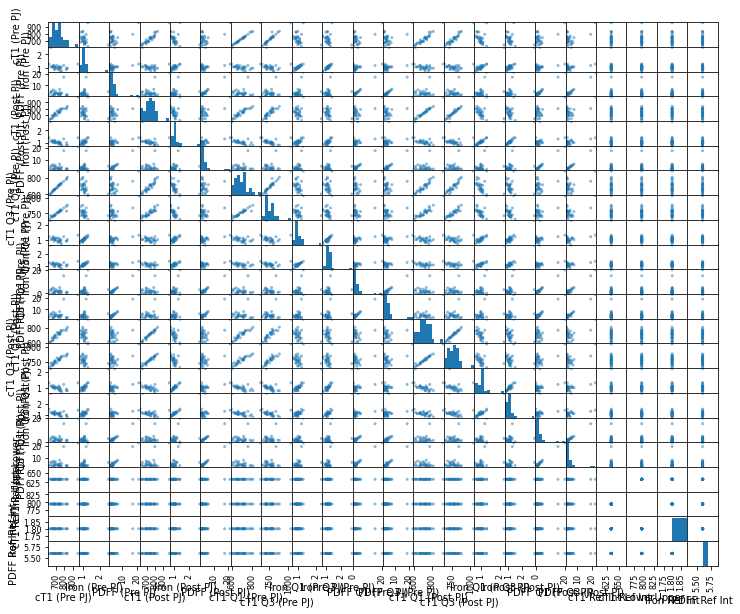

In [10]:
# Do a simple scatter matrix to see the relationship between the variables
pd.plotting.scatter_matrix(drop_row, alpha = 0.5, figsize = (12,10))

#This is an extremely busy plot with all the variables plotting against each other 

<AxesSubplot:>

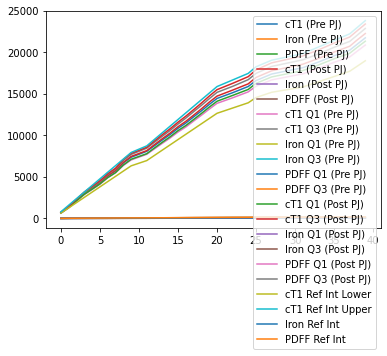

In [11]:
# this gives cumulated values
df = drop_row.cumsum() 
df.plot()


Text(0, 0.5, 'cT1')

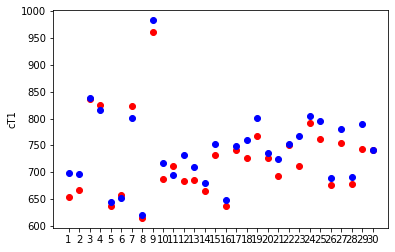

In [12]:
# To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups.
pnum = len(drop_row["Record Id"])
xlabel = np.arange(1,pnum+1)
plt.scatter(drop_row["Record Id"], drop_row["cT1 (Pre PJ)"], color = "Red")
plt.scatter(drop_row["Record Id"], drop_row["cT1 (Post PJ)"], color = "Blue")
plt.xticks(np.arange(pnum), xlabel)
plt.ylabel("cT1")

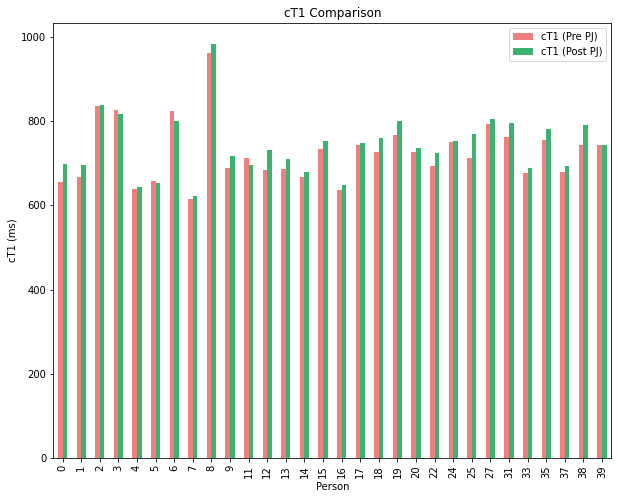

In [13]:
# plot bar comparison for cT1
cT1_color = ["lightcoral", "mediumseagreen"]
ax = drop_row[["cT1 (Pre PJ)","cT1 (Post PJ)"]].plot(kind = "bar", title = "cT1 Comparison", figsize = (10,8), color = cT1_color)
ax.set_xlabel("Person")
ax.set_ylabel("cT1 (ms)")
plt.savefig("cT1 bar comparison.png")

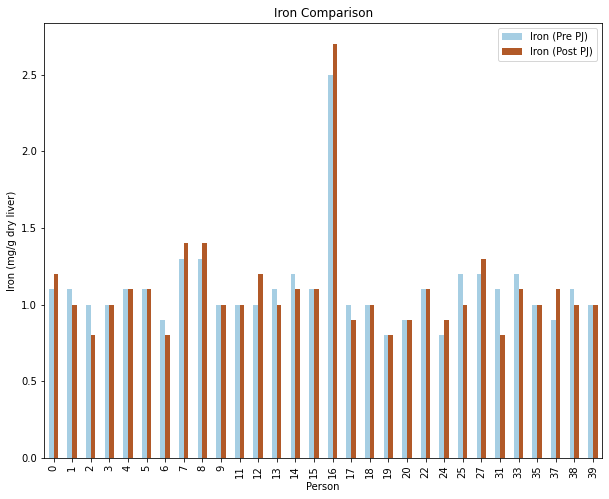

In [14]:
# plot bar comparison for Iron
ax2 = drop_row[["Iron (Pre PJ)","Iron (Post PJ)"]].plot(kind = "bar", title = "Iron Comparison", figsize = (10,8), colormap = "Paired")
ax2.set_xlabel("Person")
ax2.set_ylabel("Iron (mg/g dry liver)")
plt.savefig("Iron bar comparison.png")

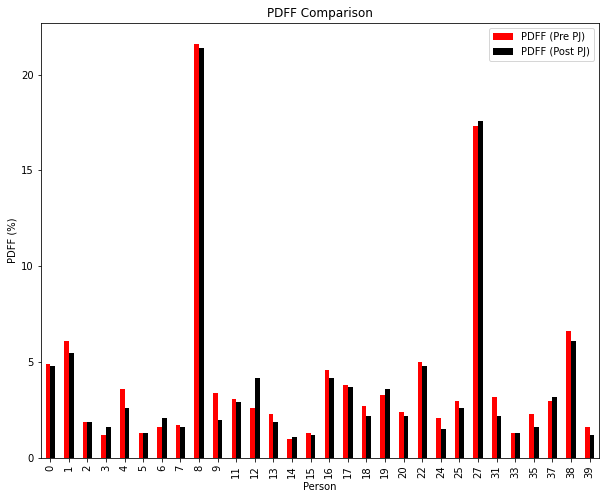

In [15]:
# plot bar comparison for PDFF
ax3 = drop_row[["PDFF (Pre PJ)","PDFF (Post PJ)"]].plot(kind = "bar", title = "PDFF Comparison", figsize = (10,8), colormap = "flag")
ax3.set_xlabel("Person")
ax3.set_ylabel("PDFF (%)")
plt.savefig("PDFF bar comparison.png")

Text(0, 0.5, 'cT1 (ms)')

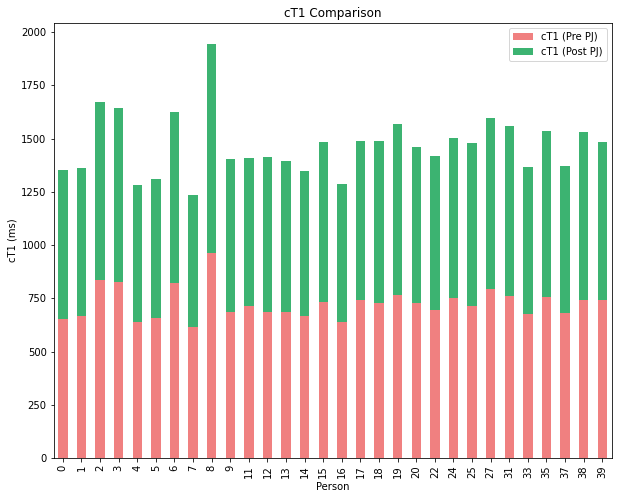

In [16]:
# stacked bar plot wouldn't work to see the differences
cT1_color = ["lightcoral", "mediumseagreen"]
ax = drop_row[["cT1 (Pre PJ)","cT1 (Post PJ)"]].plot(kind = "bar", stacked = True, title = "cT1 Comparison", figsize = (10,8), color = cT1_color)
ax.set_xlabel("Person")
ax.set_ylabel("cT1 (ms)")

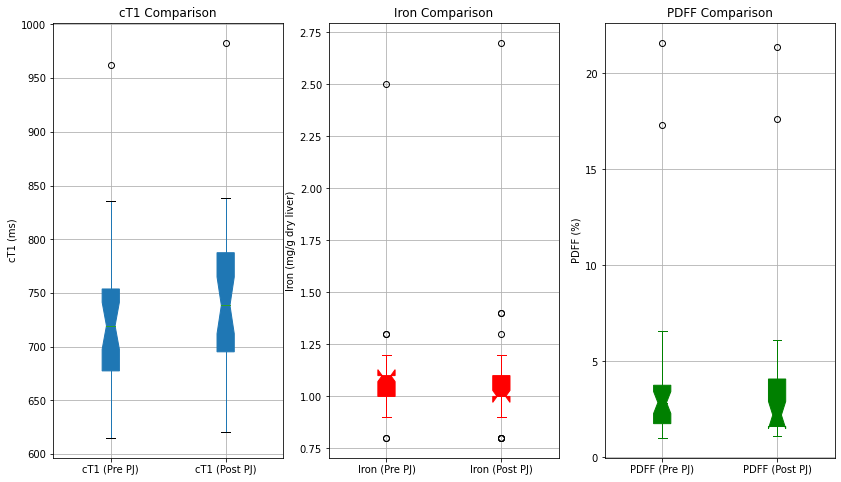

In [17]:
# Plor box plot to see the distributiont of the paried values.
# After removing the NaN rows and columns, there are still some outliers.
# By judging on the median (not assuming normal distribution), the cT1 values seems to increse after pineaple juice administration, the iron concentration seems to decrease, and the PDFF value seems to decrease after pineaple juice administration.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,8))
fontsize = 10
drop_row[["cT1 (Pre PJ)","cT1 (Post PJ)"]].plot.box(ax = axes[0], grid = True, title = "cT1 Comparison", ylabel = "cT1 (ms)" , fontsize = fontsize, patch_artist = True, notch = True)

drop_row[["Iron (Pre PJ)","Iron (Post PJ)"]].plot.box(ax = axes[1],grid = True, title = "Iron Comparison", ylabel = "Iron (mg/g dry liver)" , fontsize = fontsize, patch_artist = True, notch = True, color = "red")

drop_row[["PDFF (Pre PJ)","PDFF (Post PJ)"]].plot.box(ax = axes[2],grid = True, title = "PDFF Comparison", ylabel = "PDFF (%)" , fontsize = fontsize, patch_artist = True, notch = True, color = "green")

plt.savefig("Box comparison.png")

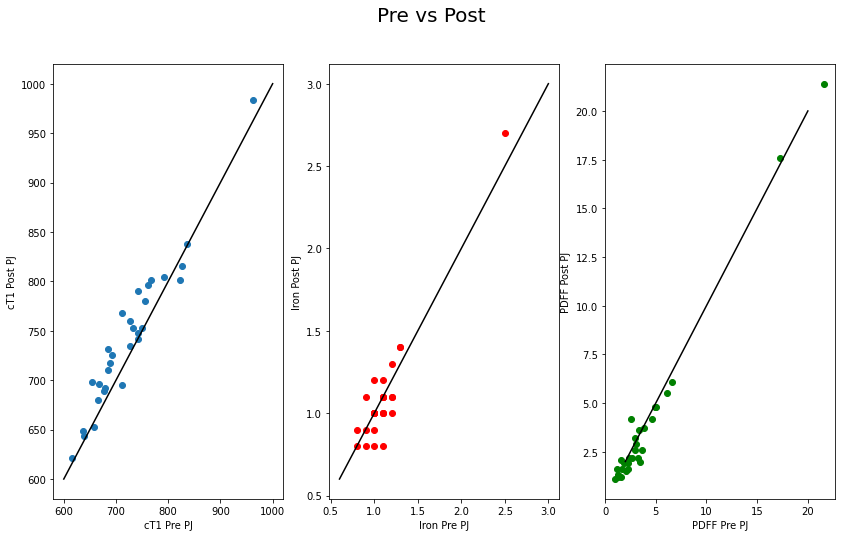

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,8))
fig.suptitle("Pre vs Post", fontsize = 20)

cT1_range = [600,1000]
Iron_range = [0.6, 3]
PDFF_range = [2, 20]

axes[0].scatter(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"])
axes[0].plot(cT1_range, cT1_range, c = "black")
axes[0].set_xlabel("cT1 Pre PJ")
axes[0].set_ylabel("cT1 Post PJ")

axes[1].scatter(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"], c = "red")
axes[1].plot(Iron_range, Iron_range, c = "black")
axes[1].set_xlabel("Iron Pre PJ")
axes[1].set_ylabel("Iron Post PJ")

axes[2].scatter(drop_row["PDFF (Pre PJ)"], drop_row["PDFF (Post PJ)"], c = "green")
axes[2].plot(PDFF_range, PDFF_range, c = "black")
axes[2].set_xlabel("PDFF Pre PJ")
axes[2].set_ylabel("PDFF Post PJ")

plt.savefig("Scatter Comparison.png")

In [19]:
# Get a summary of descriptive statistics before removing the outliers
table1 = drop_row.describe()
dfi.export(table1, "Descriptive Statistics with outliers.png")

[0405/125334.970789:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmplrlwgbqu/temp.png.
[0405/125336.627415:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmpa2g8h28i/temp.png.
[0405/125338.611549:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmp2rx4ac2q/temp.png.


In [20]:
# Get rid of outliers
stats.zscore(drop_row["cT1 (Pre PJ)"]) #calculate the z-score for the column cT1 (Pre PJ)
abs(stats.zscore(drop_row["cT1 (Pre PJ)"])) # get the absolute value of the z scores, because the direction doesn't matter
#we can see there is one outlier, i.e., the z score is more that 3 standard deviation away. (3.17536447)

0     0.996089
1     0.813792
2     1.556068
3     1.415840
4     1.220455
5     0.939998
6     1.373771
7     1.542980
8     3.322946
9     0.519313
11    0.182764
12    0.575404
13    0.561381
14    0.827815
15    0.111715
16    1.234478
17    0.237921
18    0.027578
19    0.588492
20    0.027578
22    0.449198
24    0.350104
25    0.182764
27    0.939063
31    0.504355
33    0.673564
35    0.420218
37    0.645518
38    0.251944
39    0.237921
Name: cT1 (Pre PJ), dtype: float64

In [21]:
# we can use boonlean to easily find the outlier
abs(stats.zscore(drop_row["cT1 (Pre PJ)"]))<3

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
22     True
24     True
25     True
27     True
31     True
33     True
35     True
37     True
38     True
39     True
Name: cT1 (Pre PJ), dtype: bool

In [22]:
# remove the row that has the outlier in cT1 (Pre PJ)
rm_ct1outlier = drop_row[(np.abs(stats.zscore(drop_row["cT1 (Pre PJ)"]))<3)]
rm_ct1outlier.info() # now that there are only 29 rows of values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 29 non-null     object 
 1   Portal ID LMS0 (pre PJ)   29 non-null     object 
 2   LMS0 (pre PJ)             29 non-null     object 
 3   Portal ID LMS1 (post PJ)  29 non-null     object 
 4   LMS1 (post PJ)            29 non-null     object 
 5   cT1 (Pre PJ)              29 non-null     float64
 6   Iron (Pre PJ)             29 non-null     float64
 7   PDFF (Pre PJ)             29 non-null     float64
 8   cT1 (Post PJ)             29 non-null     float64
 9   Iron (Post PJ)            29 non-null     float64
 10  PDFF (Post PJ)            29 non-null     float64
 11  cT1 Q1 (Pre PJ)           29 non-null     float64
 12  cT1 Q3 (Pre PJ)           29 non-null     float64
 13  Iron Q1 (Pre PJ)          29 non-null     float64
 14  Iron Q3 (Pre

In [23]:
# Remove all the rows that has outliers.
abs(stats.zscore(drop_row[["cT1 (Pre PJ)", "Iron (Pre PJ)",	"PDFF (Pre PJ)","cT1 (Post PJ)", "Iron (Post PJ)", "PDFF (Post PJ)"]])) < 3 

# Use this criteria to index the dataframe. The .all(axis = 1) ensures that for each row, all column satisfy the constraint
rm_outlier = drop_row[(abs(stats.zscore(drop_row[["cT1 (Pre PJ)", "Iron (Pre PJ)",	"PDFF (Pre PJ)","cT1 (Post PJ)", "Iron (Post PJ)", "PDFF (Post PJ)"]])) < 3 ).all(axis = 1)]
rm_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 39
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 27 non-null     object 
 1   Portal ID LMS0 (pre PJ)   27 non-null     object 
 2   LMS0 (pre PJ)             27 non-null     object 
 3   Portal ID LMS1 (post PJ)  27 non-null     object 
 4   LMS1 (post PJ)            27 non-null     object 
 5   cT1 (Pre PJ)              27 non-null     float64
 6   Iron (Pre PJ)             27 non-null     float64
 7   PDFF (Pre PJ)             27 non-null     float64
 8   cT1 (Post PJ)             27 non-null     float64
 9   Iron (Post PJ)            27 non-null     float64
 10  PDFF (Post PJ)            27 non-null     float64
 11  cT1 Q1 (Pre PJ)           27 non-null     float64
 12  cT1 Q3 (Pre PJ)           27 non-null     float64
 13  Iron Q1 (Pre PJ)          27 non-null     float64
 14  Iron Q3 (Pre

In [24]:
# Get the descriptive statistics of the data that removed the outliers
table2 = rm_outlier.describe()
type(table2)

pandas.core.frame.DataFrame

In [25]:
table2

,cT1 (Pre PJ),Iron (Pre PJ),PDFF (Pre PJ),cT1 (Post PJ),Iron (Post PJ),PDFF (Post PJ),cT1 Q1 (Pre PJ),cT1 Q3 (Pre PJ),Iron Q1 (Pre PJ),Iron Q3 (Pre PJ),...,cT1 Q1 (Post PJ),cT1 Q3 (Post PJ),Iron Q1 (Post PJ),Iron Q3 (Post PJ),PDFF Q1 (Post PJ),PDFF Q3 (Post PJ),cT1 Ref Int Lower,cT1 Ref Int Upper,Iron Ref Int,PDFF Ref Int
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,2.700000e+01,2.700000e+01
mean,717.037037,1.040741,2.825926,734.555556,1.014815,2.625926,690.259259,751.888889,0.981481,1.100000,...,705.333333,770.407407,0.962963,1.074074,1.466667,3.959259,633.0,794.0,1.800000e+00,5.600000e+00
std,56.312645,0.118514,1.464869,54.690270,0.137851,1.405646,52.883466,53.906852,0.121012,0.124035,...,52.182373,58.280000,0.130526,0.153404,1.341927,1.460311,0.0,0.0,2.262744e-16,9.050976e-16
min,615.000000,0.800000,1.000000,621.000000,0.800000,1.100000,597.000000,652.000000,0.700000,0.800000,...,600.000000,656.000000,0.700000,0.800000,0.000000,2.400000,633.0,794.0,1.800000e+00,5.600000e+00
25%,678.000000,1.000000,1.650000,695.500000,0.950000,1.600000,655.000000,712.000000,0.900000,1.000000,...,668.000000,730.500000,0.900000,1.000000,0.400000,2.850000,633.0,794.0,1.800000e+00,5.600000e+00
50%,712.000000,1.000000,2.600000,735.000000,1.000000,2.200000,683.000000,759.000000,1.000000,1.100000,...,711.000000,778.000000,1.000000,1.100000,1.300000,3.400000,633.0,794.0,1.800000e+00,5.600000e+00
75%,746.500000,1.100000,3.350000,774.000000,1.100000,3.400000,717.000000,785.000000,1.100000,1.200000,...,735.500000,811.500000,1.000000,1.150000,2.150000,4.500000,633.0,794.0,1.800000e+00,5.600000e+00
max,836.000000,1.300000,6.600000,838.000000,1.400000,6.100000,808.000000,881.000000,1.200000,1.300000,...,810.000000,881.000000,1.300000,1.500000,4.500000,7.700000,633.0,794.0,1.800000e+00,5.600000e+00


In [26]:
# Use the datafram_image library to save the descriptive statistics
dfi.export(table2, "Descriptive Statistics without outliers.png")

[0405/125341.110997:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmpjl8kf_uu/temp.png.
[0405/125342.750468:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmpl5dzof2l/temp.png.
[0405/125344.755288:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmpt_pt1k7c/temp.png.


In [27]:
# Deduct the value of Post and Pre PJ
cT1_dif = rm_outlier["cT1 (Post PJ)"] - rm_outlier["cT1 (Pre PJ)"]
Iron_dif = rm_outlier["Iron (Post PJ)"] - rm_outlier["Iron (Pre PJ)"]
PDFF_dif = rm_outlier["PDFF (Post PJ)"] - rm_outlier["PDFF (Pre PJ)"]

In [28]:
# Expand the dataframe with the differences
rm_outlier["cT1 Dif"] = cT1_dif
rm_outlier["Iron Dif"] = Iron_dif
rm_outlier["PDFF Dif"] = PDFF_dif

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2159451810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rm_outlier["cT1 Dif"] = cT1_dif
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2159451810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rm_outlier["Iron Dif"] = Iron_dif
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2159451810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

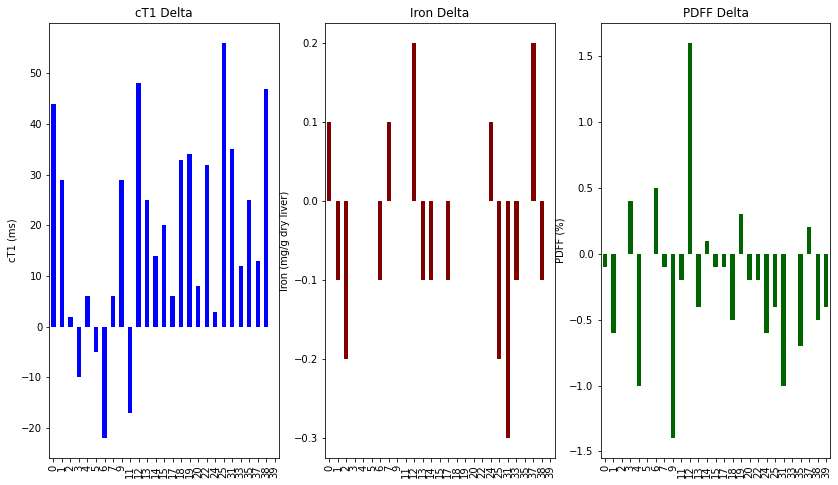

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,8))

rm_outlier["cT1 Dif"].plot.bar(ax =axes[0], title = "cT1 Delta" , color = "blue", ylabel = "cT1 (ms)")

rm_outlier["Iron Dif"].plot.bar(ax =axes[1], title = "Iron Delta", color = "maroon", ylabel = "Iron (mg/g dry liver)")

rm_outlier["PDFF Dif"].plot.bar(ax =axes[2], title = "PDFF Delta", color = "darkgreen", ylabel = "PDFF (%)")

plt.savefig("Delta between Pre and Post PJ.png")

#From the trend, it seems 

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2096755785.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_row["cT1 Dif"] = cT1_dif
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2096755785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_row["Iron Dif"] = Iron_dif
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/2096755785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

<AxesSubplot:title={'center':'PDFF (Post-Pre)'}, ylabel='PDFF (%)'>

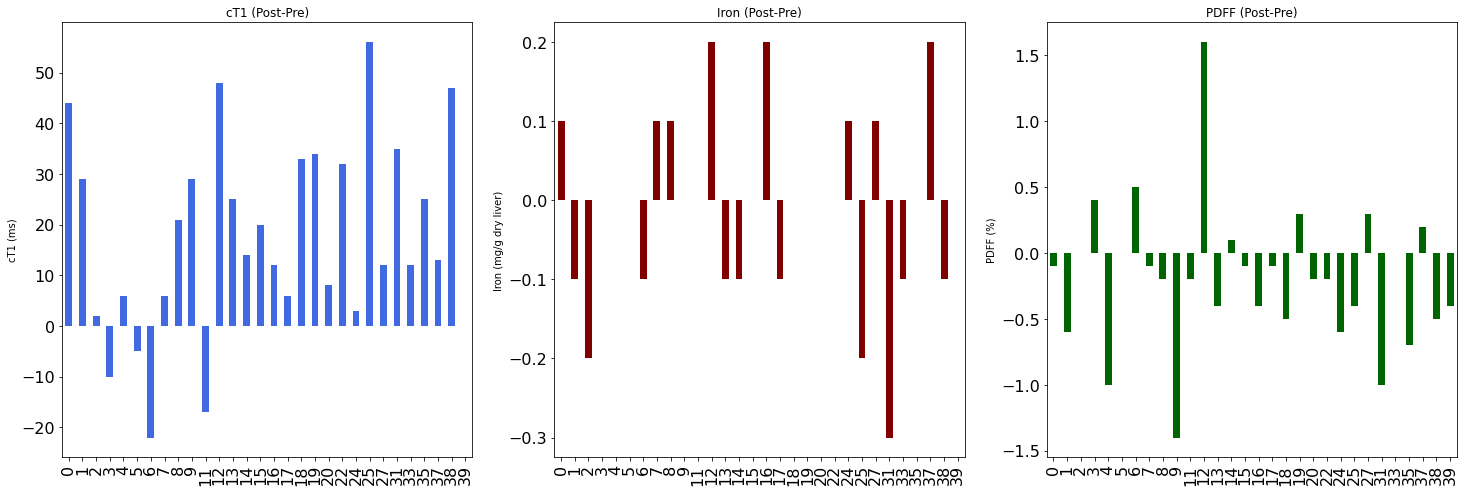

In [30]:
#plot the delta with drop_row

cT1_dif  = drop_row["cT1 (Post PJ)"] -  drop_row["cT1 (Pre PJ)"]
Iron_dif = drop_row["Iron (Post PJ)"] - drop_row["Iron (Pre PJ)"]
PDFF_dif = drop_row["PDFF (Post PJ)"] - drop_row["PDFF (Pre PJ)"]

drop_row["cT1 Dif"] = cT1_dif
drop_row["Iron Dif"] = Iron_dif
drop_row["PDFF Dif"] = PDFF_dif

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))
drop_row["cT1 Dif"].plot.bar(ax =axes[0], title = "cT1 (Post-Pre)" , color = "royalblue", ylabel = "cT1 (ms)", fontsize = 16)

drop_row["Iron Dif"].plot.bar(ax =axes[1], title = "Iron (Post-Pre)", color = "maroon", ylabel = "Iron (mg/g dry liver)", fontsize = 16)

drop_row["PDFF Dif"].plot.bar(ax =axes[2], title = "PDFF (Post-Pre)", color = "darkgreen", ylabel = "PDFF (%)", fontsize = 16)
#plt.savefig("Bar Plot Comparison")

In [31]:
drop_row['median_cT1Diff'] = cT1_dif.median()
drop_row['median_IronDiff'] = Iron_dif.median()
drop_row['median_PDFFDiff'] = PDFF_dif.median()

/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/549543203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_row['median_cT1Diff'] = cT1_dif.median()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/549543203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_row['median_IronDiff'] = Iron_dif.median()
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/549543203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [32]:
print(cT1_dif.median(), Iron_dif.median(), PDFF_dif.median())

13.5 0.0 -0.19999999999999996


/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/1664050937.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drop_row["Record Id"], rotation = 50)
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/1664050937.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(drop_row["Record Id"], rotation = 50)
/var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/ipykernel_85774/1664050937.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(drop_row["Record Id"], rotation = 50)


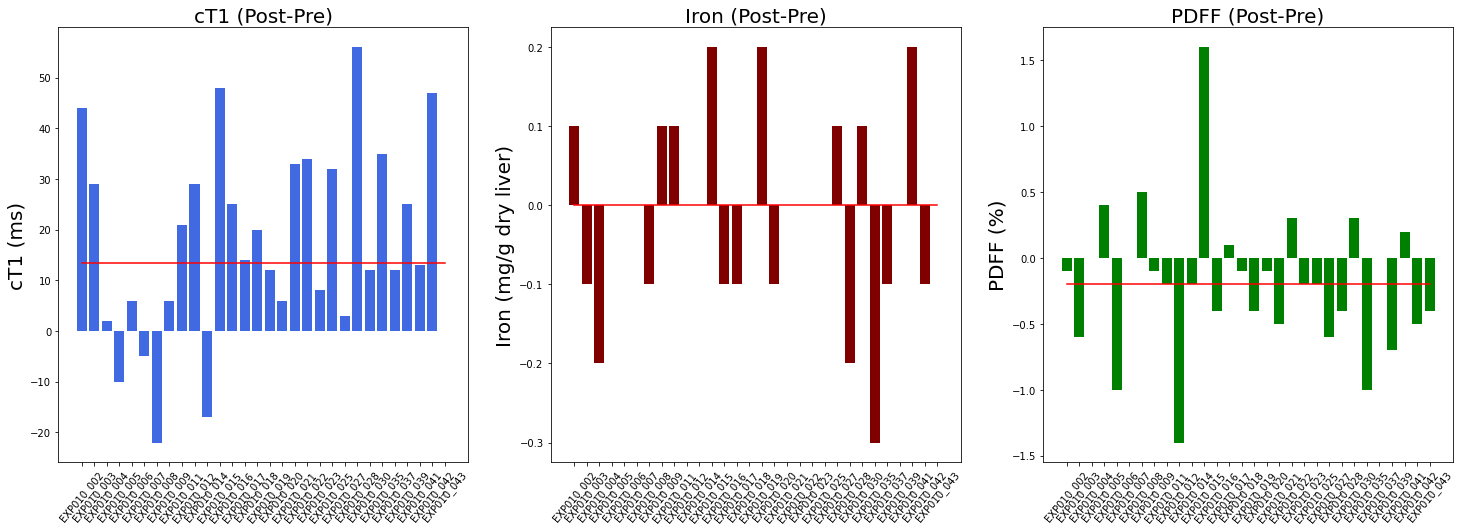

In [33]:
fig = plt.figure(figsize = (25,8))

ax1 = fig.add_subplot(131)
plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Dif"], color = "royalblue")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["median_cT1Diff"], color = 'red')
ax1.set_title('cT1 (Post-Pre)', fontsize = 20)
ax1.set_ylabel("cT1 (ms)", fontsize = 20)
ax1.set_xticklabels(drop_row["Record Id"], rotation = 50)

ax2 = fig.add_subplot(132)
plt.bar(drop_row["Record Id"], drop_row["Iron Dif"], color = "maroon")
plt.plot(drop_row["Record Id"], drop_row["median_IronDiff"], color = 'red')
ax2.set_title('Iron (Post-Pre)', fontsize = 20)
ax2.set_ylabel("Iron (mg/g dry liver)", fontsize = 20)
ax2.set_xticklabels(drop_row["Record Id"], rotation = 50)

ax3 = fig.add_subplot(133)
plt.bar(drop_row["Record Id"], drop_row["PDFF Dif"], color = "green")
plt.plot(drop_row["Record Id"], drop_row["median_PDFFDiff"], color = 'red')
ax3.set_title('PDFF (Post-Pre)', fontsize = 20)
ax3.set_ylabel("PDFF (%)", fontsize = 20)
ax3.set_xticklabels(drop_row["Record Id"], rotation = 50)
plt.savefig("Subtraction Comparison")

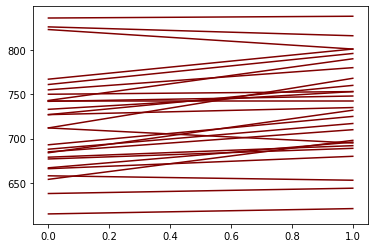

In [34]:
#If the columns are not numbered, but have a name instead, something like d[3] will fail. You would then need to select the column by its index, i.e., set the iloc
# https://stackoverflow.com/questions/45263070/key-error3-while-using-for-to-plot-using-matplotlib-pyplot-scatter


Pre = rm_outlier["cT1 (Pre PJ)"]
Post = rm_outlier["cT1 (Post PJ)"]

for i in range(len(Pre)):
    plt.plot( [0,1], [Pre.iloc[i], Post.iloc[i]], color = "maroon")

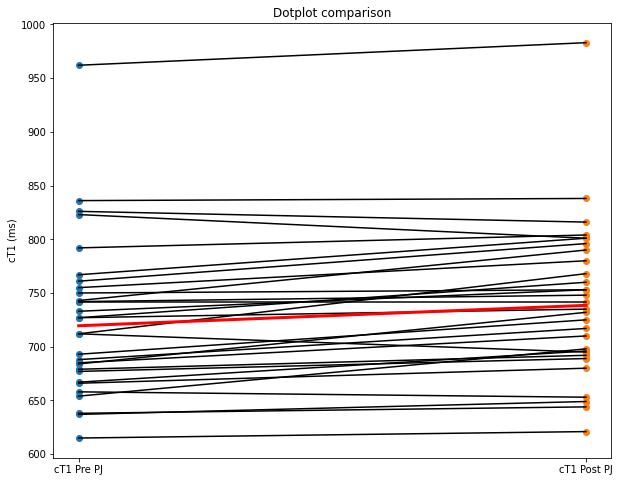

In [35]:

#Draw dotline plot
Pre = drop_row["cT1 (Pre PJ)"]
Post = drop_row["cT1 (Post PJ)"]

plt.figure(figsize = (10,8))

plt.scatter(np.zeros(len(Pre)), Pre)
plt.scatter(np.ones(len(Post)), Post)

for i in range(len(Pre)):
    plt.plot( [0,1], [Pre.iloc[i], Post.iloc[i]], color = "k")

plt.plot([0,1], [np.median(Pre), np.median(Post)], color = "red", linewidth = 3.0)
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"])
plt.ylabel("cT1 (ms)")
plt.title("Dotplot comparison")
plt.savefig("cT1 Dotplot comparison.png")

Text(0, 0.5, 'PDFF (%)')

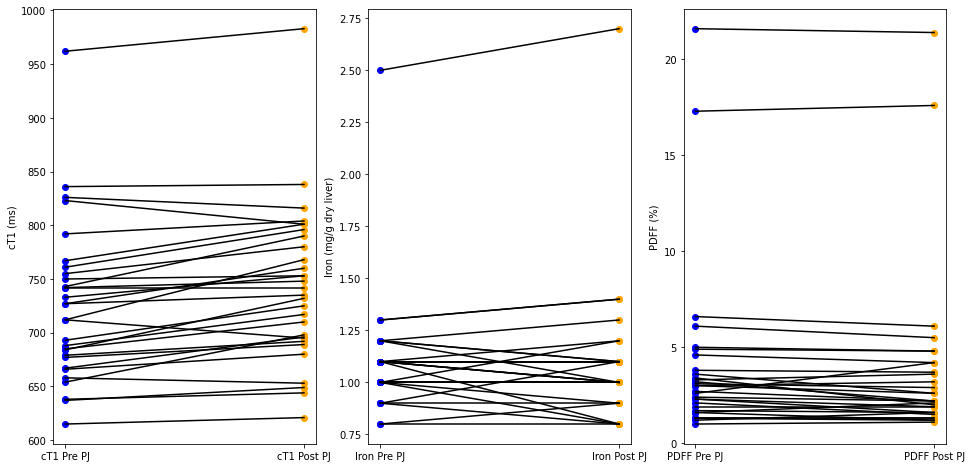

In [36]:
#subplot the 3 sets of values

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,8), sharex = False, sharey = False)


data_length = len(drop_row["cT1 (Pre PJ)"])

#Plot cT1 dotplot
axes[0].scatter(np.zeros(data_length), drop_row["cT1 (Pre PJ)"], color = "blue")
axes[0].scatter(np.ones(data_length), drop_row["cT1 (Post PJ)"], color = "orange")

for i in range(data_length):
    axes[0].plot( [0,1], [drop_row["cT1 (Pre PJ)"].iloc[i], drop_row["cT1 (Post PJ)"].iloc[i]], color = "k")

axes[0].set_xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"])
axes[0].set_ylabel("cT1 (ms)")

#Plot Iron dotplot
axes[1].scatter(np.zeros(data_length), drop_row["Iron (Pre PJ)"], color = "blue")
axes[1].scatter(np.ones(data_length), drop_row["Iron (Post PJ)"], color = "orange")

for i in range(data_length):
    axes[1].plot( [0,1], [drop_row["Iron (Pre PJ)"].iloc[i], drop_row["Iron (Post PJ)"].iloc[i]], color = "k")

axes[1].set_xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"])
axes[1].set_ylabel("Iron (mg/g dry liver)")


#Plot PDFF dotplot
axes[2].scatter(np.zeros(data_length), drop_row["PDFF (Pre PJ)"], color = "blue")
axes[2].scatter(np.ones(data_length), drop_row["PDFF (Post PJ)"], color = "orange")

for i in range(data_length):
    axes[2].plot( [0,1], [drop_row["PDFF (Pre PJ)"].iloc[i], drop_row["PDFF (Post PJ)"].iloc[i]], color = "k")

axes[2].set_xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"])
axes[2].set_ylabel("PDFF (%)")

In [37]:
np.median(drop_row["cT1 (Pre PJ)"])

719.5

In [38]:
#define the plotting function
def PrePost(a, b):
    plt.scatter(np.zeros(data_length), a, color = "blue")
    plt.scatter(np.ones(data_length), b, color = "orange")

    for i in range(data_length):
        plt.plot( [0,1], [a.iloc[i], b.iloc[i]], color = "k")
    
    plt.plot([0,1], [np.median(a), np.median(a)], color = "red", linewidth = 3.0)

In [39]:
#how to use median to explain?

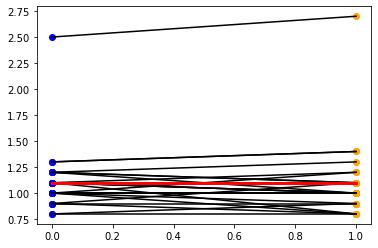

In [40]:
#test the plotting function with Iron data
PrePost(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"] )

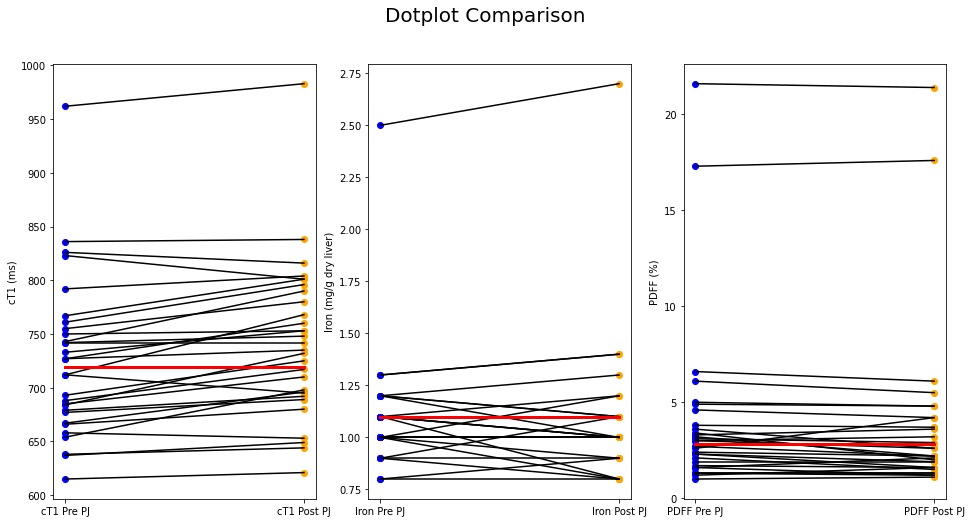

In [41]:
fig = plt.figure(figsize = (16,8))
fig.suptitle("Dotplot Comparison", fontsize = 20)

data_length = len(drop_row["cT1 (Pre PJ)"])

fig.add_subplot(131)
PrePost(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"])
plt.xticks([0,1], ["cT1 Pre PJ", "cT1 Post PJ"]) #add the xtick and y label 
plt.ylabel("cT1 (ms)")

fig.add_subplot(132)
PrePost(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"])
plt.xticks([0,1], ["Iron Pre PJ", "Iron Post PJ"])
plt.ylabel("Iron (mg/g dry liver)")

fig.add_subplot(133)
PrePost(drop_row["PDFF (Pre PJ)"], drop_row["PDFF (Post PJ)"])
plt.xticks([0,1], ["PDFF Pre PJ", "PDFF Post PJ"])
plt.ylabel("PDFF (%)")
plt.savefig("Dotplot Comparison")

<AxesSubplot:title={'center':'PDFF Post'}, ylabel='Frequency'>

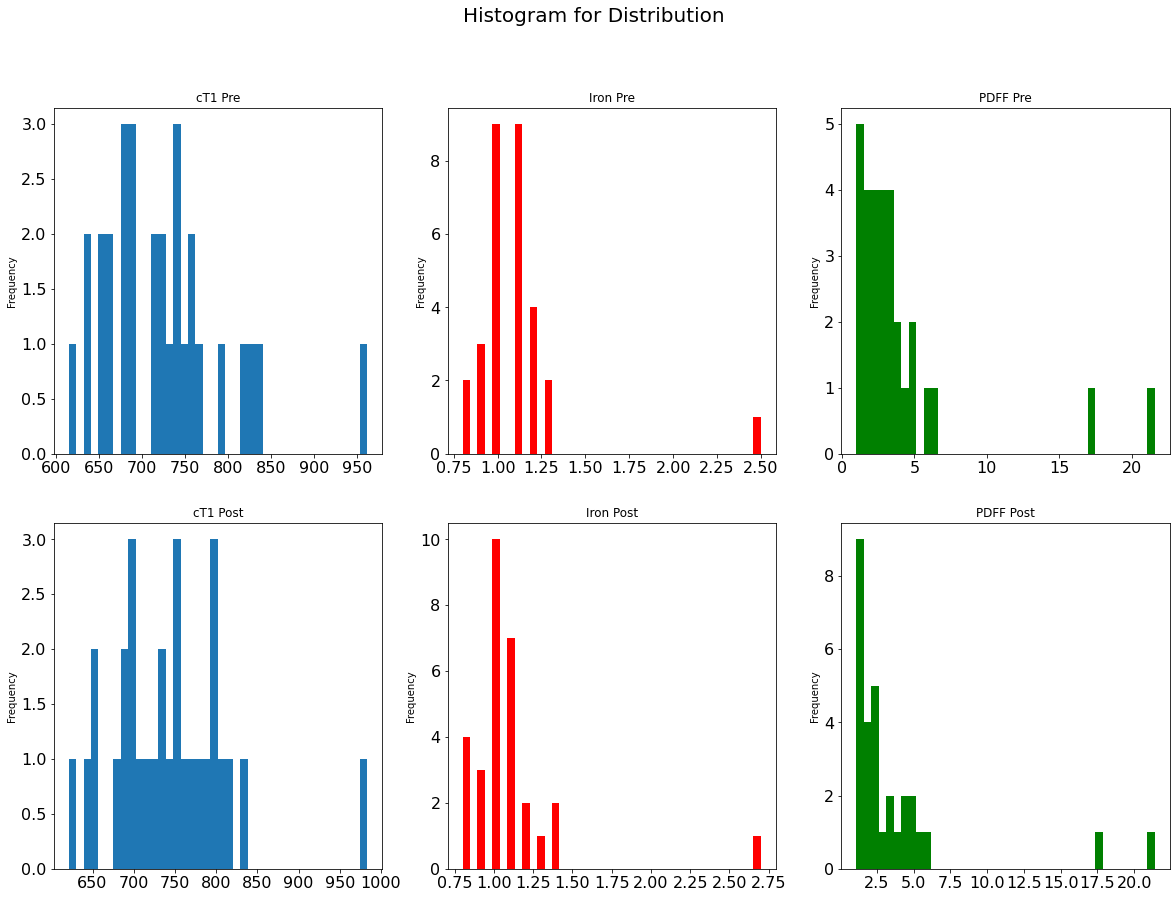

In [42]:
# Use histogram to see the distribution of cT1 (Pre PJ)
fig = plt.figure(figsize = (20,14))
fig.suptitle("Histogram for Distribution", fontsize = 20)

fig.add_subplot(231)
drop_row["cT1 (Pre PJ)"].plot.hist(bins = 40, title  = "cT1 Pre", fontsize = 16)
fig.add_subplot(232)
drop_row["Iron (Pre PJ)"].plot.hist(bins = 40, title = "Iron Pre", color = "red", fontsize = 16)
fig.add_subplot(233)
drop_row["PDFF (Pre PJ)"].plot.hist(bins = 40, title = "PDFF Pre", color = "green", fontsize = 16)
fig.add_subplot(234)
drop_row["cT1 (Post PJ)"].plot.hist(bins = 40, title  = "cT1 Post", fontsize = 16)
fig.add_subplot(235)
drop_row["Iron (Post PJ)"].plot.hist(bins = 40, title = "Iron Post", color = "red", fontsize = 16)
fig.add_subplot(236)
drop_row["PDFF (Post PJ)"].plot.hist(bins = 40, title = "PDFF Post", color = "green",fontsize = 16)

#plt.savefig("Histogram.png")
# The distrobution of the values seems not to be normally distributed

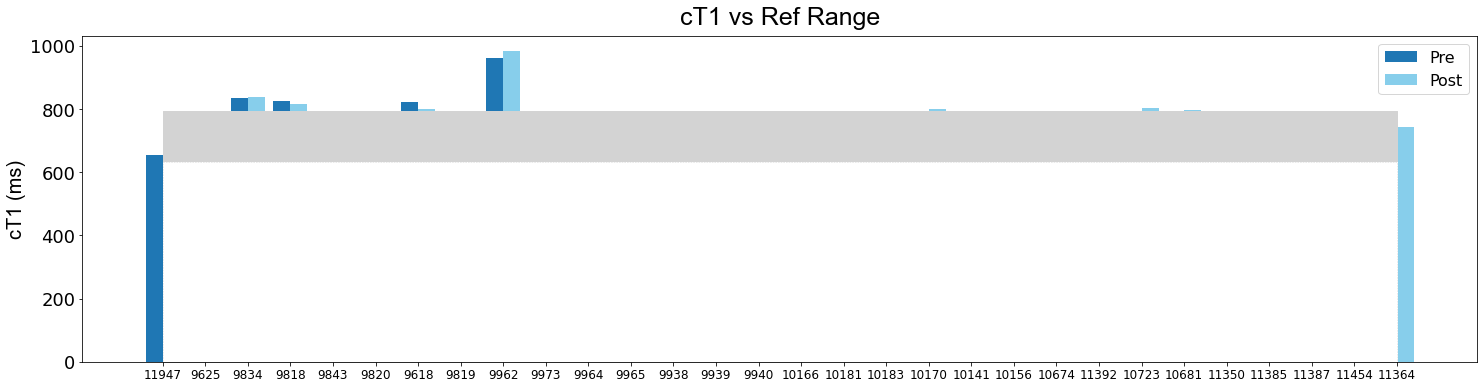

In [43]:
#make bar plot in relation to the reference range

title_font = {'fontname':'Arial', 'size':'25', 'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'20'}
cT1_Pre_std = np.std(drop_row["cT1 (Pre PJ)"])

ax = plt.subplots(1, figsize = (25,6))
plt.title("cT1 vs Ref Range", **title_font)
pre = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 (Pre PJ)"], width = -0.4, align = 'edge')
post = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 (Post PJ)"],  width = 0.4, align = 'edge', color = 'skyblue')
plt.legend([pre, post], ['Pre', 'Post'], fontsize = 16)
plt.ylabel('cT1 (ms)', **axis_font)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 18)

plt.fill_between(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Ref Int Upper"], color = "lightgray")
plt.fill_between(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Ref Int Lower"], color = "white", linestyle = ":")
plt.savefig("cT1 vs Ref Range.png")

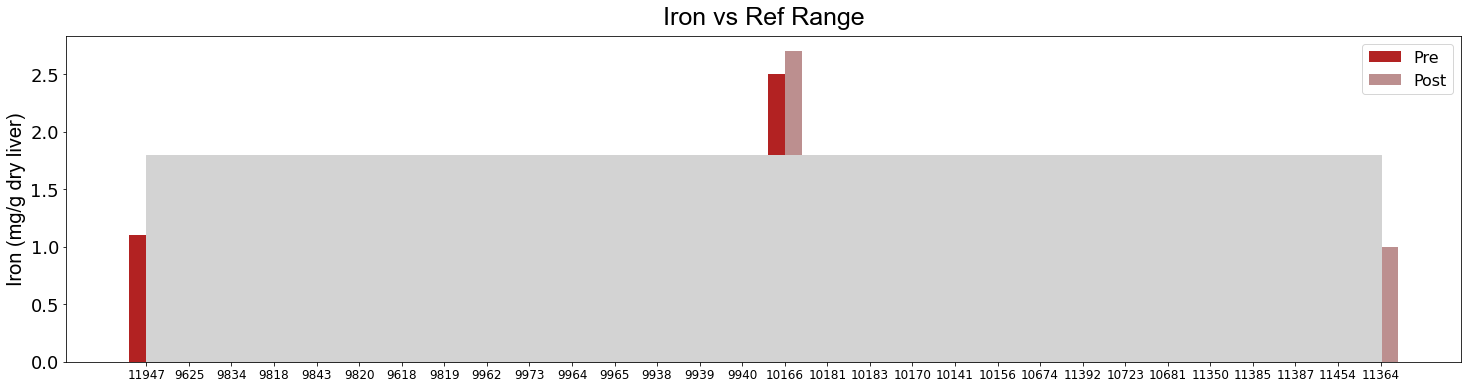

In [44]:
title_font = {'fontname':'Arial', 'size':'25', 'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'20'}
cT1_Pre_std = np.std(drop_row["Iron (Pre PJ)"])

ax = plt.subplots(1, figsize = (25,6))
plt.title("Iron vs Ref Range", **title_font)
pre = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron (Pre PJ)"], width = -0.4, align = 'edge', color = 'firebrick')
post = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron (Post PJ)"],  width = 0.4, align = 'edge', color = 'rosybrown')
plt.legend([pre, post], ['Pre', 'Post'], fontsize = 16)
plt.ylabel('Iron (mg/g dry liver)', **axis_font)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 18)

plt.fill_between(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron Ref Int"], color = "lightgray")
plt.savefig("Iron vs Ref Range.png")

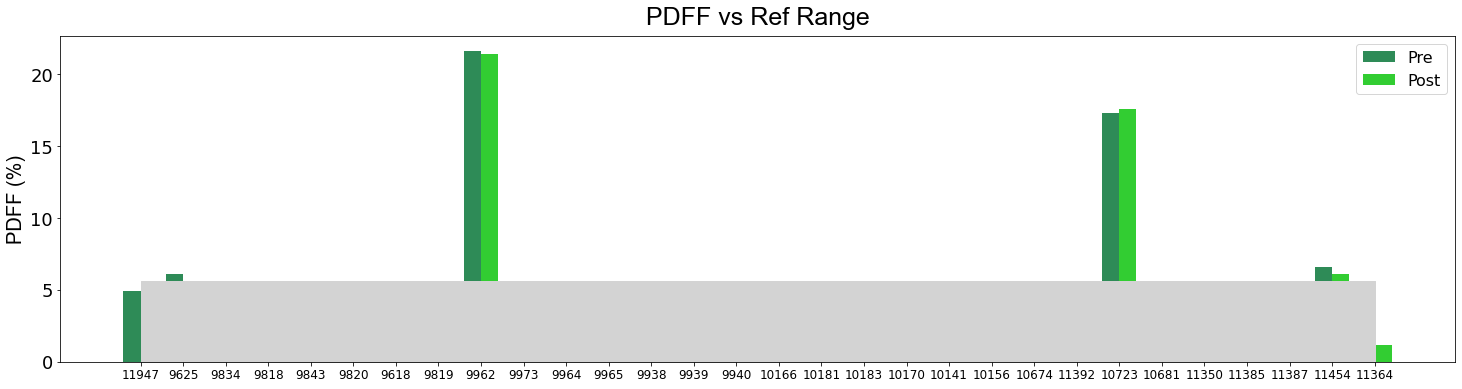

In [45]:
title_font = {'fontname':'Arial', 'size':'25', 'verticalalignment':'bottom'}
axis_font = {'fontname':'Arial', 'size':'20'}

ax = plt.subplots(1, figsize = (25,6))
plt.title("PDFF vs Ref Range", **title_font)
pre = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["PDFF (Pre PJ)"], width = -0.4, align = 'edge', color = 'seagreen')
post = plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["PDFF (Post PJ)"],  width = 0.4, align = 'edge', color = 'limegreen')
plt.legend([pre, post], ['Pre', 'Post'], fontsize = 16)
plt.ylabel('PDFF (%)', **axis_font)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 18)

plt.fill_between(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["PDFF Ref Int"], color = "lightgray")

plt.savefig("PDFF vs Ref Range.png")

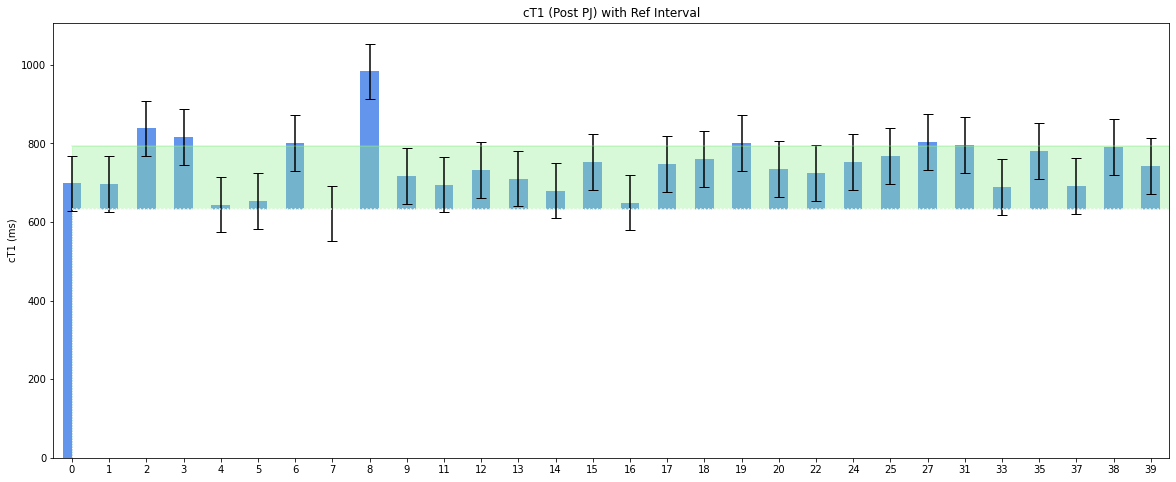

In [46]:
cT1_Post_std = np.std(drop_row["cT1 (Post PJ)"])

drop_row["cT1 (Post PJ)"].plot.bar(title = "cT1 (Post PJ) with Ref Interval", yerr = cT1_Post_std, capsize = 5 , ylabel = "cT1 (ms)", color = "cornflowerblue", figsize = (20,8))
drop_row["cT1 Ref Int Upper"].plot.area(color = "lightgreen", alpha = 0.35)
drop_row["cT1 Ref Int Lower"].plot.area(color = "white", linestyle = ":")

plt.savefig("cT1 (Post PJ) with Individual Error Bar and Reference Rrange")

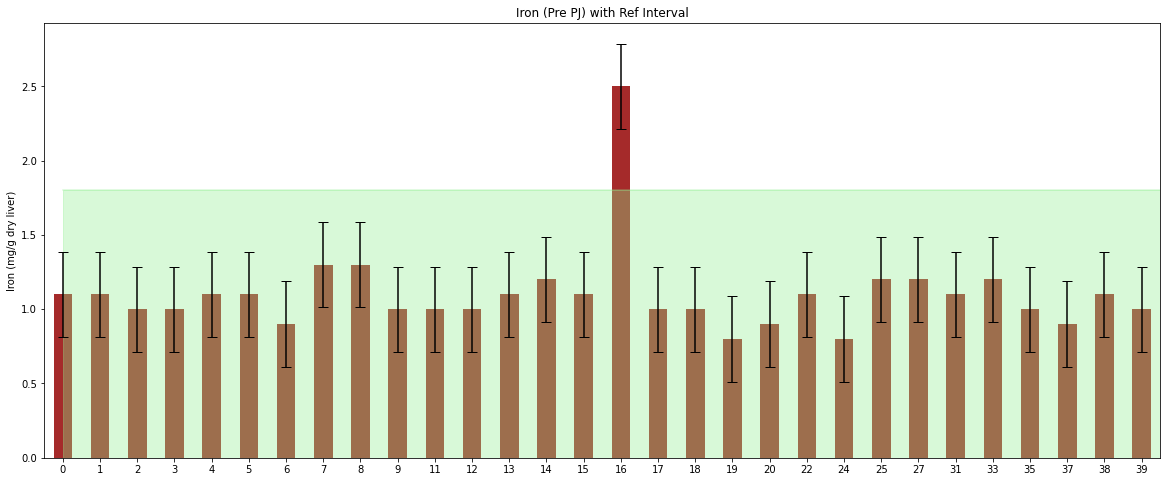

In [47]:
Iron_Pre_std = np.std(drop_row["Iron (Pre PJ)"])

drop_row["Iron (Pre PJ)"].plot.bar(title = "Iron (Pre PJ) with Ref Interval", yerr = Iron_Pre_std, capsize = 5 , ylabel = "Iron (mg/g dry liver)", color = "brown" ,figsize = (20,8))
drop_row["Iron Ref Int"].plot.area(color = "lightgreen", alpha = 0.35)


plt.savefig("Iron (Pre PJ) with Individual Error Bar and Reference Rrange")

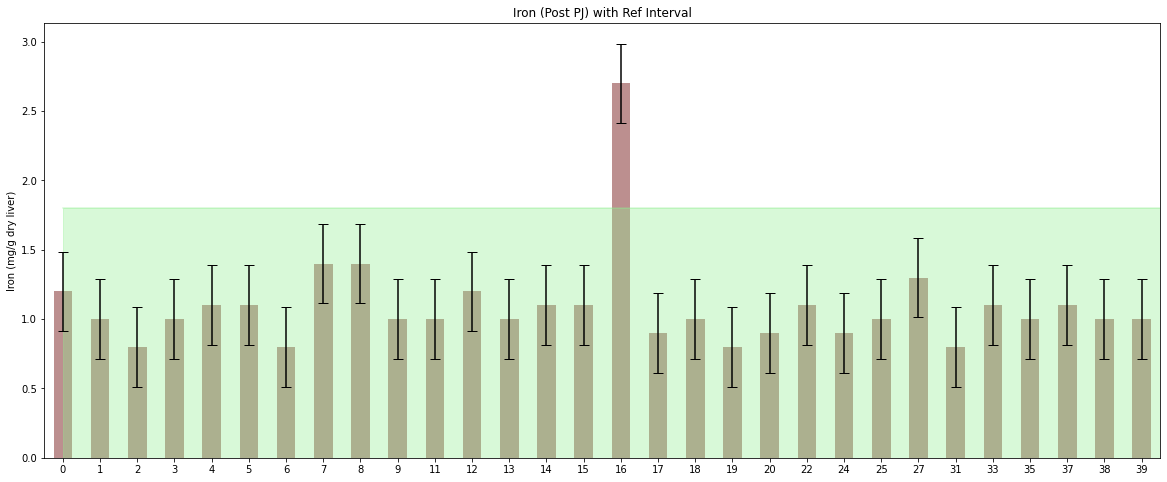

In [48]:
Iron_Post_std = np.std(drop_row["Iron (Post PJ)"])

drop_row["Iron (Post PJ)"].plot.bar(title = "Iron (Post PJ) with Ref Interval", yerr = Iron_Pre_std, capsize = 5 , ylabel = "Iron (mg/g dry liver)", color = "rosybrown" ,figsize = (20,8))
drop_row["Iron Ref Int"].plot.area(color = "lightgreen", alpha = 0.35)


plt.savefig("Iron (Post PJ) with Individual Error Bar and Reference Rrange")

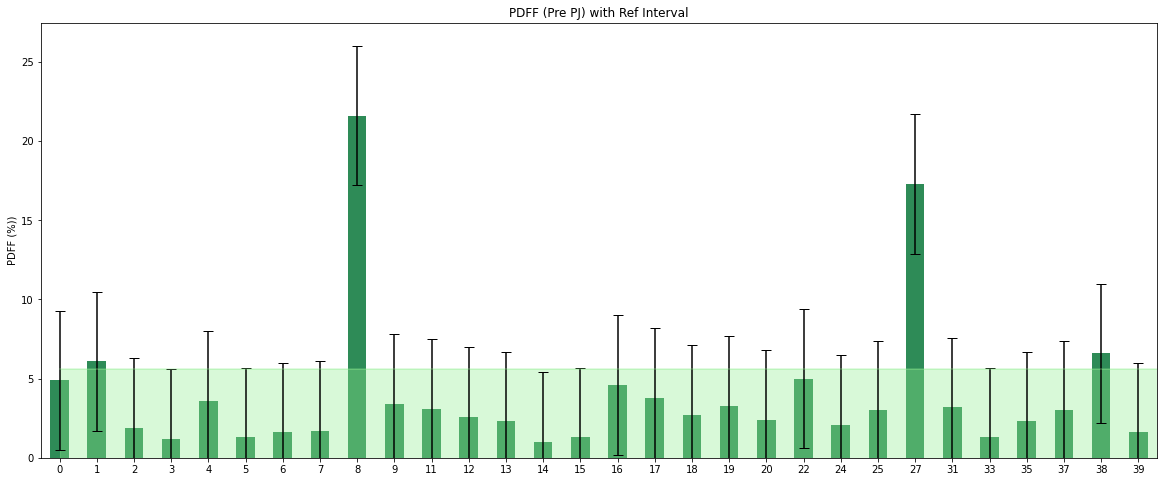

In [49]:
PDFF_Pre_std = np.std(drop_row["PDFF (Pre PJ)"])

drop_row["PDFF (Pre PJ)"].plot.bar(title = "PDFF (Pre PJ) with Ref Interval", yerr = PDFF_Pre_std, capsize = 5 , ylabel = "PDFF (%))", color = "seagreen" ,figsize = (20,8))
drop_row["PDFF Ref Int"].plot.area(color = "lightgreen", alpha = 0.35)


plt.savefig("PDFF (Pre PJ) with Individual Error Bar and Reference Rrange")

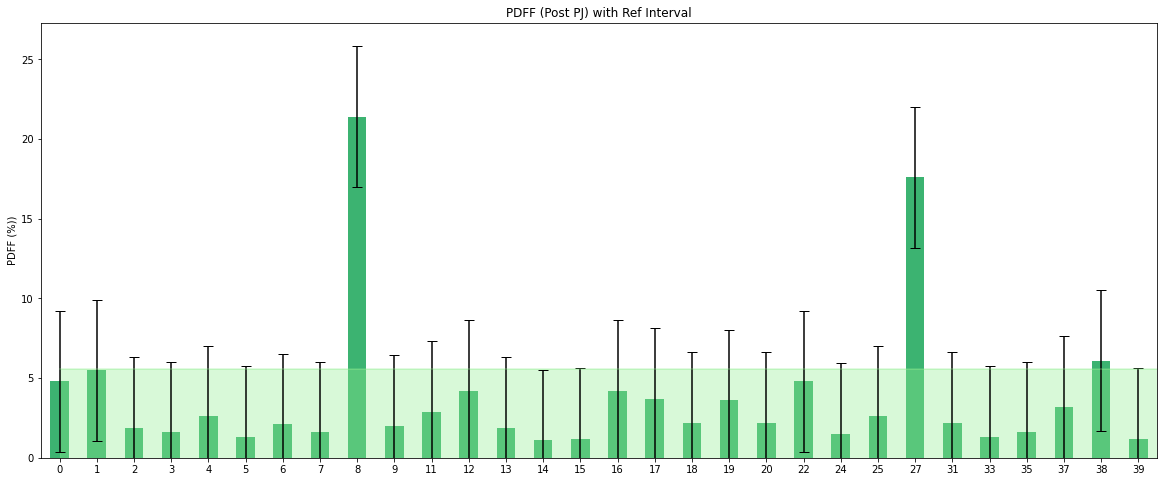

In [50]:
PDFF_Post_std = np.std(drop_row["PDFF (Post PJ)"])

drop_row["PDFF (Post PJ)"].plot.bar(title = "PDFF (Post PJ) with Ref Interval", yerr = PDFF_Post_std, capsize = 5 , ylabel = "PDFF (%))", color = "mediumseagreen" ,figsize = (20,8))
drop_row["PDFF Ref Int"].plot.area(color = "lightgreen", alpha = 0.35)


plt.savefig("PDFF (Post PJ) with Individual Error Bar and Reference Rrange")

Text(0, 0.5, 'cT1 (Pre PJ) (ms)')

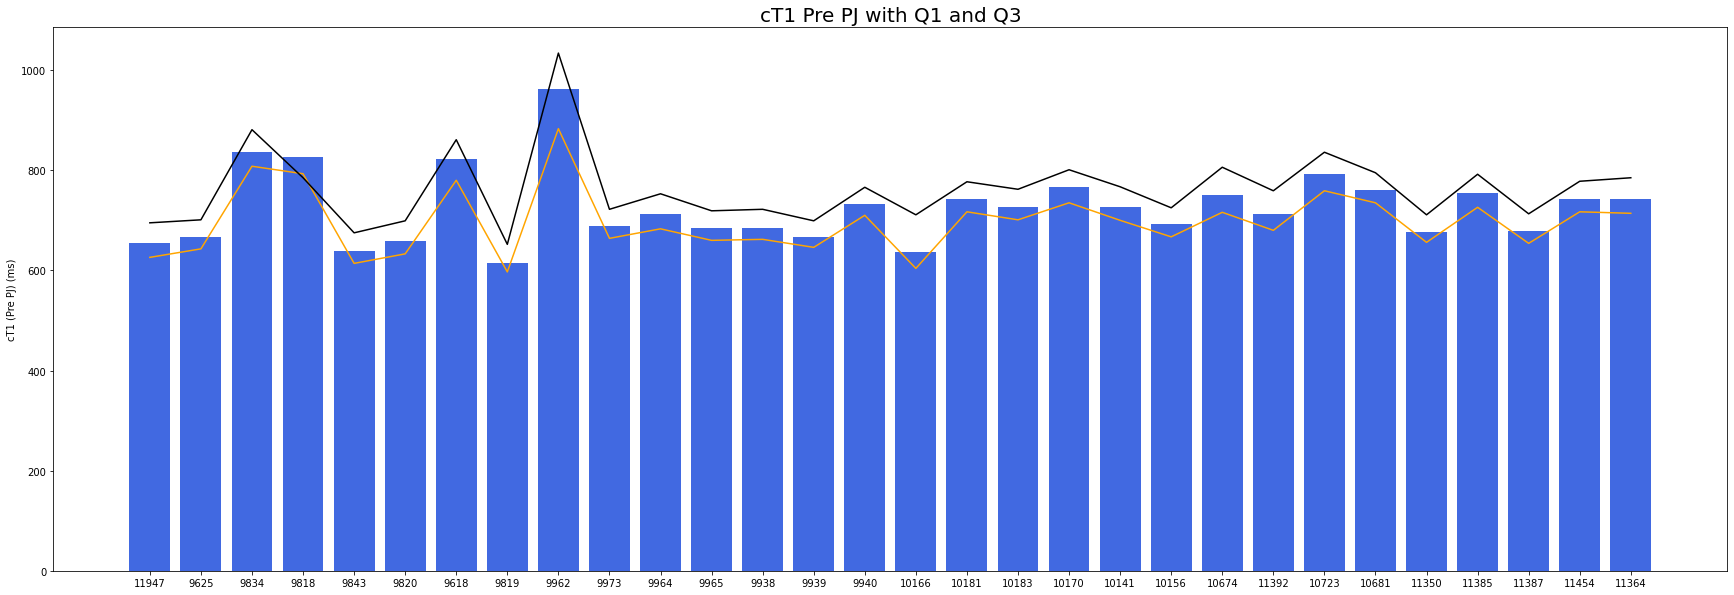

In [51]:
f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("cT1 Pre PJ with Q1 and Q3", fontsize = 20)

plt.bar( drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 (Pre PJ)"], color = "royalblue")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q1 (Pre PJ)"], c = "orange")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q3 (Pre PJ)"], c = "black")

plt.ylabel("cT1 (Pre PJ) (ms)")

Text(0, 0.5, 'cT1 Post PJ')

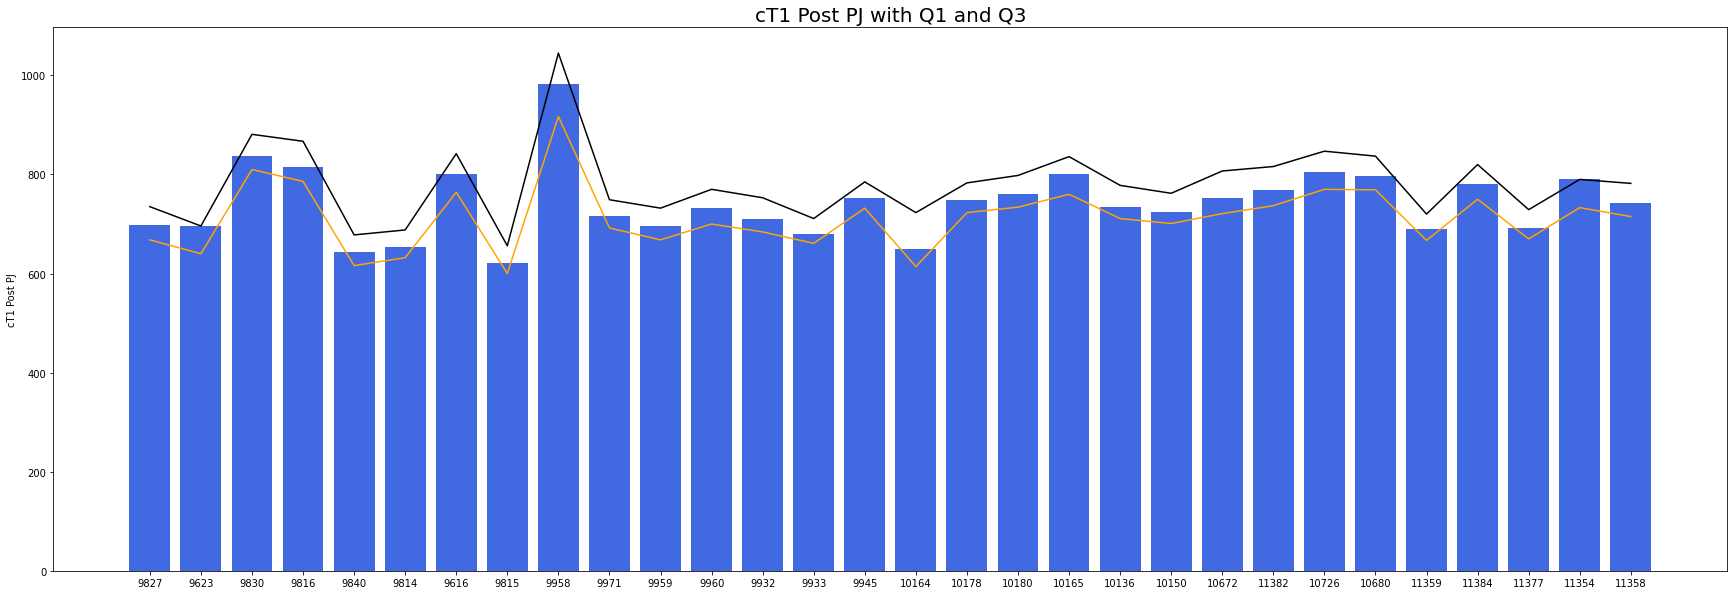

In [52]:
# Plot the Bar and see the interquartile range

f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("cT1 Post PJ with Q1 and Q3", fontsize = 20)
plt.bar(drop_row["Portal ID LMS1 (post PJ)"], drop_row["cT1 (Post PJ)"], color = "royalblue")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["cT1 Q1 (Post PJ)"], c = "orange")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["cT1 Q3 (Post PJ)"], c = "black")

plt.ylabel("cT1 Post PJ")

Text(0, 0.5, 'Iron (Pre PJ)')

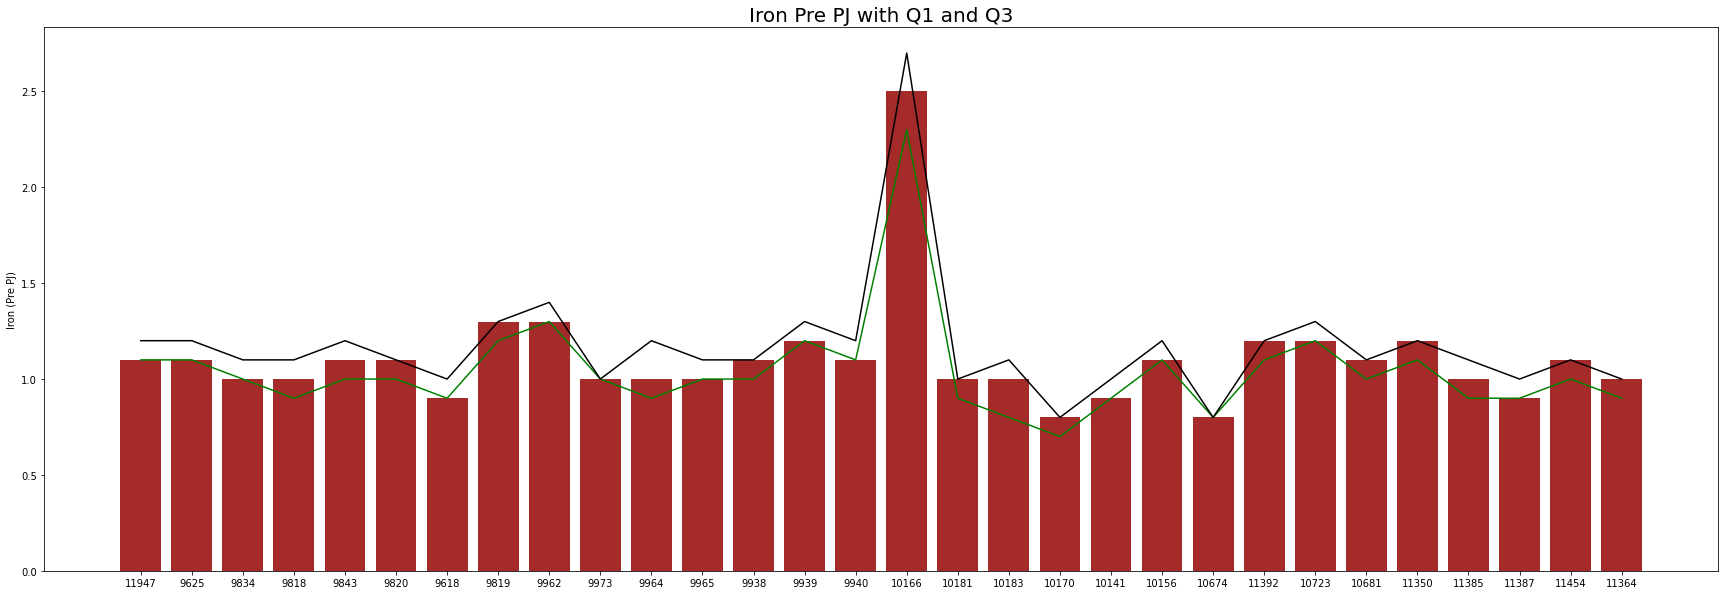

In [53]:
f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("Iron Pre PJ with Q1 and Q3", fontsize = 20)
plt.bar(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron (Pre PJ)"], color = "brown")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron Q1 (Pre PJ)"], c = "green")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["Iron Q3 (Pre PJ)"], c = "black")
plt.ylabel("Iron (Pre PJ)")

Text(0, 0.5, 'Iron (Post PJ)')

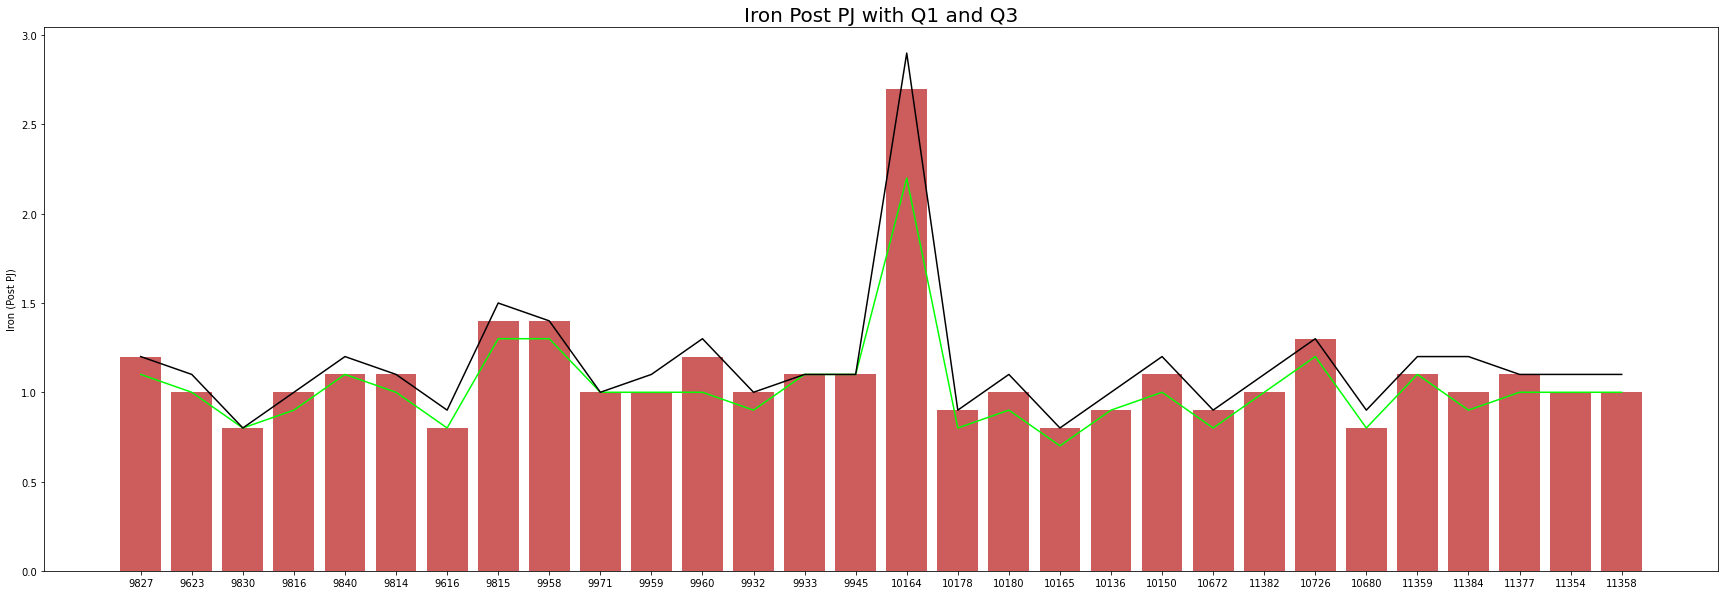

In [54]:
f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("Iron Post PJ with Q1 and Q3", fontsize = 20)
plt.bar(drop_row["Portal ID LMS1 (post PJ)"],  drop_row["Iron (Post PJ)"], color = "indianred")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["Iron Q1 (Post PJ)"], c = "lime")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["Iron Q3 (Post PJ)"], c = "black")
plt.ylabel("Iron (Post PJ)")

Text(0, 0.5, 'PDFF (Pre PJ)')

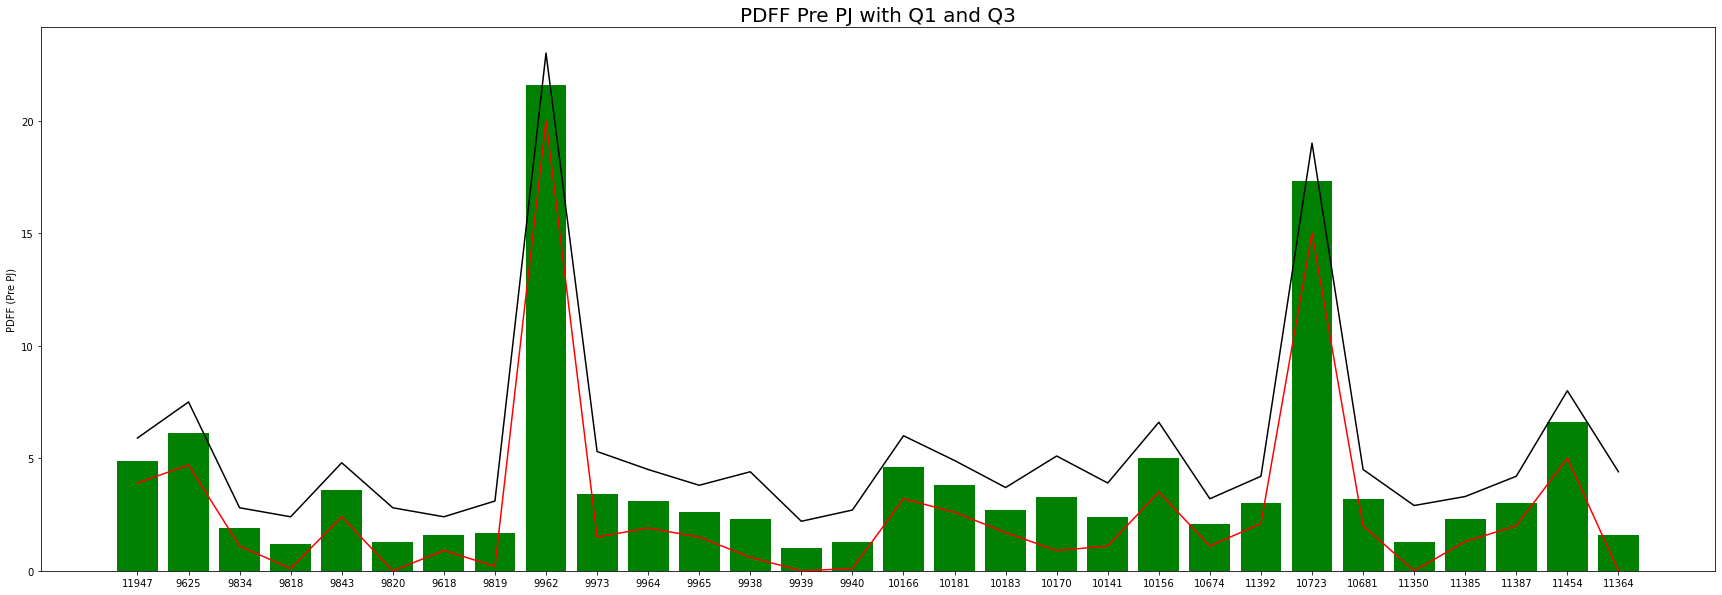

In [55]:
f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("PDFF Pre PJ with Q1 and Q3", fontsize = 20)
plt.bar(drop_row["Portal ID LMS0 (pre PJ)"],  drop_row["PDFF (Pre PJ)"], color = "green")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["PDFF Q1 (Pre PJ)"], c = "red")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["PDFF Q3 (Pre PJ)"], c = "black")
plt.ylabel("PDFF (Pre PJ)")

Text(0, 0.5, 'PDFF (Post PJ)')

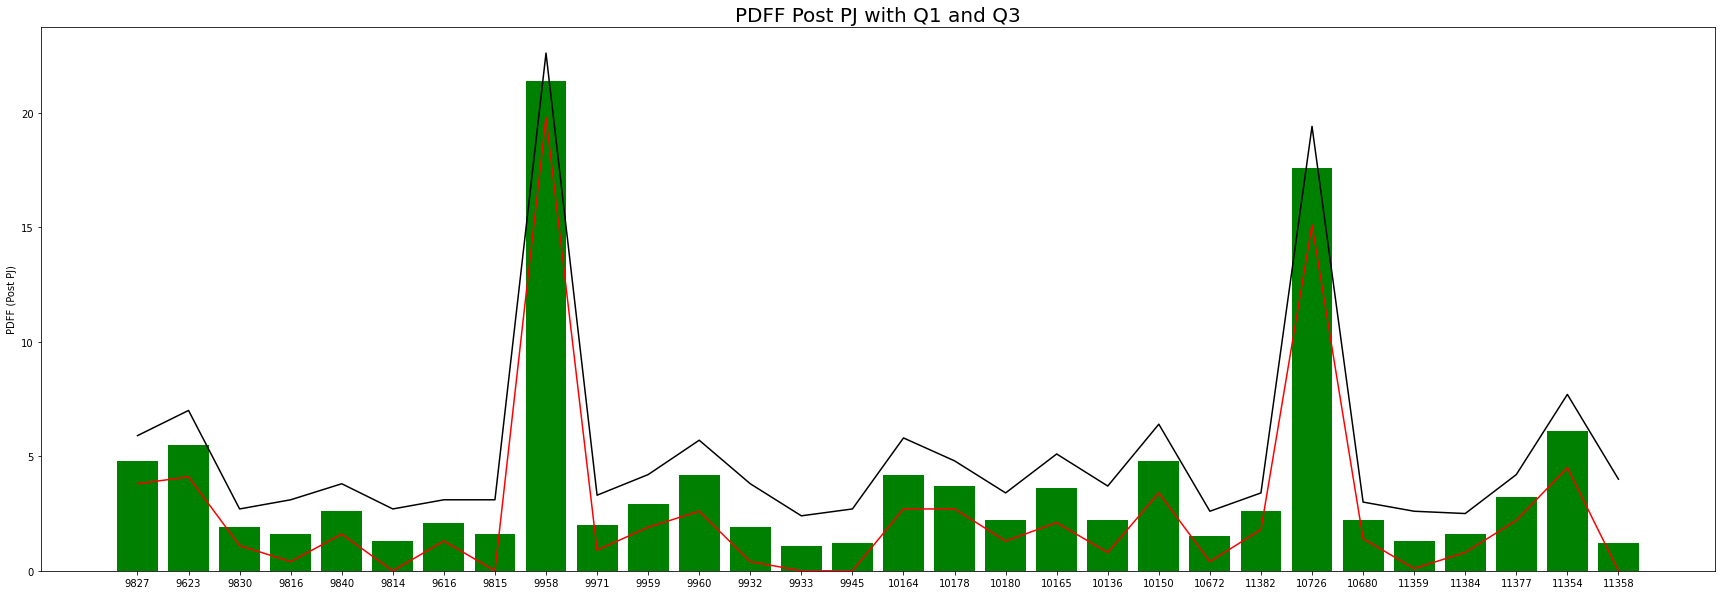

In [56]:
f, ax = plt.subplots(1, figsize = (30,10))
ax.set_title("PDFF Post PJ with Q1 and Q3", fontsize = 20)
plt.bar(drop_row["Portal ID LMS1 (post PJ)"],  drop_row["PDFF (Post PJ)"], color = "green")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["PDFF Q1 (Post PJ)"], c = "red")
plt.plot(drop_row["Portal ID LMS1 (post PJ)"], drop_row["PDFF Q3 (Post PJ)"], c = "black")
plt.ylabel("PDFF (Post PJ)")

Text(0, 0.5, 'cT1')

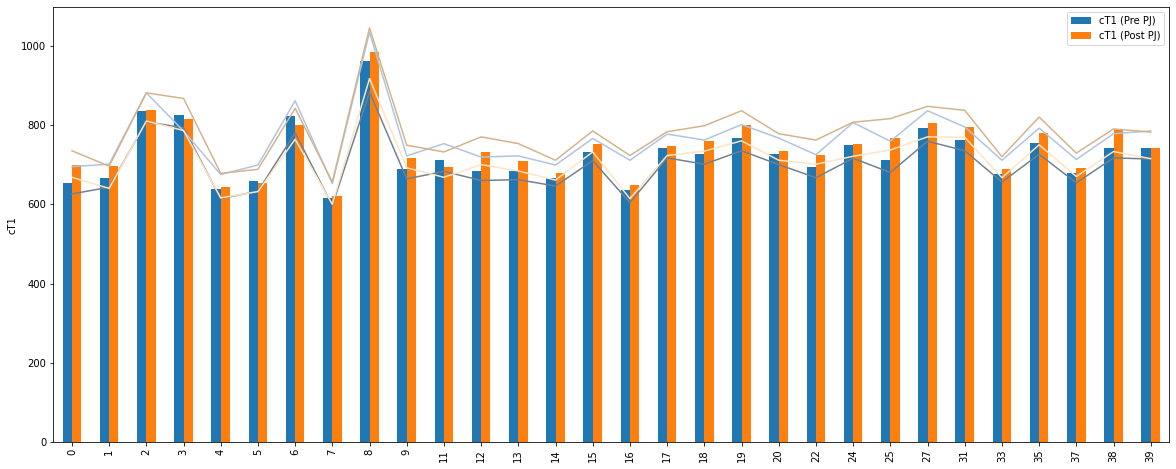

In [57]:
# Plot the individual values of pre and post together

f, ax = plt.subplots(1, figsize = (20,8))
drop_row[["cT1 (Pre PJ)", "cT1 (Post PJ)"]].plot(kind = 'bar', ax = ax)
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q1 (Pre PJ)"], color = "slategray")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q3 (Pre PJ)"], color = "lightsteelblue")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q1 (Post PJ)"], color = "bisque")
plt.plot(drop_row["Portal ID LMS0 (pre PJ)"], drop_row["cT1 Q3 (Post PJ)"], color = "tan")
plt.ylabel("cT1")

In [58]:
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 39
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Record Id                 30 non-null     object 
 1   Portal ID LMS0 (pre PJ)   30 non-null     object 
 2   LMS0 (pre PJ)             30 non-null     object 
 3   Portal ID LMS1 (post PJ)  30 non-null     object 
 4   LMS1 (post PJ)            30 non-null     object 
 5   cT1 (Pre PJ)              30 non-null     float64
 6   Iron (Pre PJ)             30 non-null     float64
 7   PDFF (Pre PJ)             30 non-null     float64
 8   cT1 (Post PJ)             30 non-null     float64
 9   Iron (Post PJ)            30 non-null     float64
 10  PDFF (Post PJ)            30 non-null     float64
 11  cT1 Q1 (Pre PJ)           30 non-null     float64
 12  cT1 Q3 (Pre PJ)           30 non-null     float64
 13  Iron Q1 (Pre PJ)          30 non-null     float64
 14  Iron Q3 (Pre

In [59]:
# Use Shapio- Wilk test to test Normality
# If W is less than one, the dataset is away from being drawn from normal distribution.
# The p value of Shapiro Wilk Test is to test the hyposthesis of the Shapio-Wilk test to reject the null Ho
# Shapiro Wilk test is quite sensitive, sometimes if the data from histigram seems normallt distributed, it can still be test with parametric t test.
# https://www.youtube.com/watch?v=dRAqSsgkCUc&ab_channel=MatthewE.Clapham



a = stats.shapiro(drop_row["cT1 (Pre PJ)"])
b = stats.shapiro(drop_row["Iron (Pre PJ)"])
c = stats.shapiro(drop_row["PDFF (Pre PJ)"])
d = stats.shapiro(drop_row["cT1 (Post PJ)"])
e = stats.shapiro(drop_row["Iron (Post PJ)"])
f = stats.shapiro(drop_row["PDFF (Post PJ)"])

data = {"Biomarkers" : ["cT1 Pre PJ", "Iron (Pre PJ)", "PDFF (Pe PJ)", "cT1 (Post PJ)", "Iron (Post PF)", "PDFF (Post PJ)"], "Shapiro Wilk Test Result (W, p value)": [a, b, c, d, e, f], "Normal Distribution?": ["No", "No", "No", "No", "No", "No"]}
SP = pd.DataFrame(data = data)
SP.style.set_caption("Shapiro Wilk Test for Normality")
#dfi.export(SP, "Shapiro Wilk Test for Normality.png")


,Biomarkers,"Shapiro Wilk Test Result (W, p value)",Normal Distribution?
0,cT1 Pre PJ,"ShapiroResult(statistic=0.9188844561576843, pvalue=0.02509433589875698)",No
1,Iron (Pre PJ),"ShapiroResult(statistic=0.5750721096992493, pvalue=3.671300063956551e-08)",No
2,PDFF (Pe PJ),"ShapiroResult(statistic=0.5686153769493103, pvalue=3.085715860606797e-08)",No
3,cT1 (Post PJ),"ShapiroResult(statistic=0.9297100305557251, pvalue=0.048240117728710175)",No
4,Iron (Post PF),"ShapiroResult(statistic=0.5906507968902588, pvalue=5.622899834634154e-08)",No
5,PDFF (Post PJ),"ShapiroResult(statistic=0.5470784902572632, pvalue=1.7488773096374644e-08)",No


In [60]:
# Strictly speaking because the cT1 datasets failed Shapiro Wilk test, it is not normallyu distributed however, given the fact that the histogram shows a distributioin similar to normal distribution, we use paired student t test to see if cT1 Pre and Post difference is significant
# Regarding whether or not using one tailed or 2-tailed, this has to be driven by expectation.  Not by looking at the data!
# https://www.youtube.com/watch?v=AZHh5iGdJUw&list=PLfhL43gLKJ5lBXJw5THlC2V0BZ1FuItuv&index=5&ab_channel=MatthewE.Clapham

cT1TT = stats.ttest_rel(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"])
IronTT = stats.ttest_rel(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"])
PDFFTT = stats.ttest_rel(drop_row["PDFF (Pre PJ)"], drop_row["PDFF (Post PJ)"])
Tcritical = '±2.001717'
data2 = {"Biomarkers":["cT1", "Iron", "PDFF"], "Paired T Test (T, p value)":[cT1TT, IronTT, PDFFTT], "T critical": [Tcritical, Tcritical, Tcritical], "Difference is significant?": ['Yes', 'No', 'No']}
TT = pd.DataFrame(data = data2)
TT
dfi.export(TT, "Paired T test Result.png")


[0405/125401.173271:INFO:headless_shell.cc(659)] Written to file /var/folders/lp/b_vqnmbx63n92ngpptk0k4480000gp/T/tmp1x1_25fq/temp.png.


In [61]:
drop_row["cT1 (Pre PJ)"]

0     654.0
1     667.0
2     836.0
3     826.0
4     638.0
5     658.0
6     823.0
7     615.0
8     962.0
9     688.0
11    712.0
12    684.0
13    685.0
14    666.0
15    733.0
16    637.0
17    742.0
18    727.0
19    767.0
20    727.0
22    693.0
24    750.0
25    712.0
27    792.0
31    761.0
33    677.0
35    755.0
37    679.0
38    743.0
39    742.0
Name: cT1 (Pre PJ), dtype: float64

In [62]:
# Use Wilcoxon signed-rank Test to see if the difference is statistically significant
# pre define alpha value = 0.05
# The critical value of the WIlcoxon singned Rank test (with the numbe of sample being 30) is 137
# if W statistics is < critical value, we reject the H0. This mean that there are significant difference between the median of both samples.

g = stats.wilcoxon(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"])
h = stats.wilcoxon(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"])
i = stats.wilcoxon(drop_row["PDFF (Pre PJ)"], drop_row["PDFF (Post PJ)"])

data3 = {"Biomarkers" : ["cT1", "Iron", "PDFF"], "Wilcoxon signed-rank Test (W, p)": [g, h, i], "W critical":[137,137,137] ,"Difference is significant?": ["Yes", "No", "Yes"]}

WX = pd.DataFrame(data = data3)
WX
#dfi.export(WX, "Wilcoxon signed-rank Test Result.png")

,Biomarkers,"Wilcoxon signed-rank Test (W, p)",W critical,Difference is significant?
0,cT1,"(42.0, 0.0001470606109612025)",137,Yes
1,Iron,"(73.5, 0.5996010101832181)",137,No
2,PDFF,"(97.0, 0.027018019605397604)",137,Yes


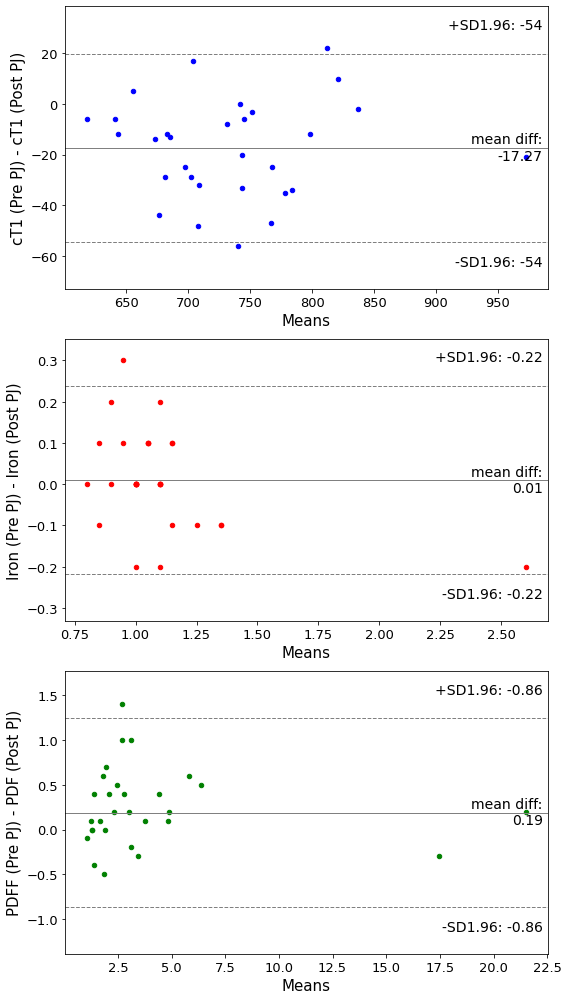

In [63]:
# Plot Bland Altman plots 
# https://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

f, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (8,14))
sm.graphics.mean_diff_plot(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"],  ax = ax[0], scatter_kwds = {"color":"blue"})
ax[0].set_ylabel("cT1 (Pre PJ) - cT1 (Post PJ)")

sm.graphics.mean_diff_plot(drop_row["Iron (Pre PJ)"], drop_row["Iron (Post PJ)"], ax = ax[1], scatter_kwds = {"color":"red"})
ax[1].set_ylabel("Iron (Pre PJ) - Iron (Post PJ)")

sm.graphics.mean_diff_plot(drop_row["PDFF (Pre PJ)"], drop_row["PDFF (Post PJ)"], ax = ax[2], scatter_kwds = {"color":"green"})
ax[2].set_ylabel("PDFF (Pre PJ) - PDF (Post PJ)")

plt.savefig("Bland Altman Plot for PJ.png")

Text(15.625, 0.5, 'cT1 (Post PJ) - cT1 (Pre PJ)')

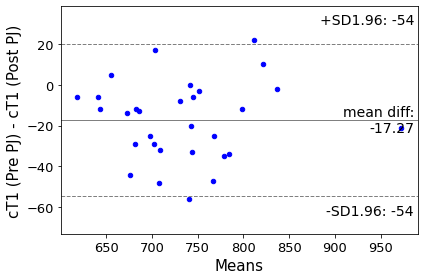

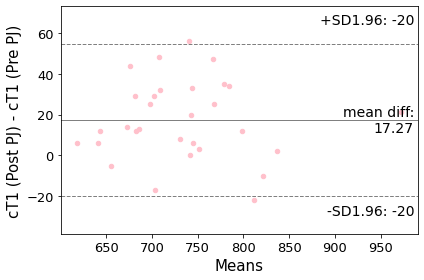

In [64]:
# Check the differences between measurement is Pre - Post or Post - Pre
sm.graphics.mean_diff_plot(drop_row["cT1 (Pre PJ)"], drop_row["cT1 (Post PJ)"], scatter_kwds = {"color":"blue"})
plt.ylabel("cT1 (Pre PJ) - cT1 (Post PJ)")

sm.graphics.mean_diff_plot(drop_row["cT1 (Post PJ)"], drop_row["cT1 (Pre PJ)"], scatter_kwds = {"color":"pink"})
plt.ylabel("cT1 (Post PJ) - cT1 (Pre PJ)")
